## 第一部分是下载数据

In [8]:
import os
import requests
import pandas as pd

# 设置API Key
API_KEY = "8ndoVgsftprr9zP9ONfyxhroPiyPCmd9"
BASE_URL = "https://financialmodelingprep.com/api/v3/"

# 设置保存数据的目录
OUTPUT_DIR = "/home/llm/data_001/励京资本"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 市场列表及其API端点
MARKETS = {
    "US": "stock/list",               # 美国股票
    "SA": "stock/list?exchange=SA",   # 沙特股票
    "SG": "stock/list?exchange=SG",   # 新加坡股票
    "KR": "stock/list?exchange=KR",   # 韩国股票
    "IN": "stock/list?exchange=IN",   # 印度股票
    "VN": "stock/list?exchange=VN",   # 越南股票
    "JP": "stock/list?exchange=JP"    # 日本股票
}

def download_stock_data(market_code, endpoint):
    """
    下载指定市场的股票列表并保存为 CSV 文件
    """
    url = f"{BASE_URL}{endpoint}&apikey={API_KEY}"
    try:
        # 请求数据
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        
        # 检查数据是否为空
        if not data:
            print(f"未获取到 {market_code} 市场的数据")
            return
        
        # 转换为 DataFrame
        df = pd.DataFrame(data)
        
        # 保存到 CSV
        output_file = os.path.join(OUTPUT_DIR, f"{market_code}_stocks.csv")
        df.to_csv(output_file, index=False, encoding="utf-8-sig")
        print(f"{market_code} 市场数据已保存到 {output_file}")
    except requests.exceptions.RequestException as e:
        print(f"请求 {market_code} 市场数据失败: {e}")
    except Exception as e:
        print(f"处理 {market_code} 数据失败: {e}")

# 下载各市场的股票数据
for market_code, endpoint in MARKETS.items():
    print(f"正在下载 {market_code} 市场的数据...")
    download_stock_data(market_code, endpoint)

正在下载 US 市场的数据...
请求 US 市场数据失败: 401 Client Error: Unauthorized for url: https://financialmodelingprep.com/api/v3/stock/list&apikey=8ndoVgsftprr9zP9ONfyxhroPiyPCmd9
正在下载 SA 市场的数据...
SA 市场数据已保存到 /home/llm/data_001/励京资本/SA_stocks.csv
正在下载 SG 市场的数据...
SG 市场数据已保存到 /home/llm/data_001/励京资本/SG_stocks.csv
正在下载 KR 市场的数据...
KR 市场数据已保存到 /home/llm/data_001/励京资本/KR_stocks.csv
正在下载 IN 市场的数据...
IN 市场数据已保存到 /home/llm/data_001/励京资本/IN_stocks.csv
正在下载 VN 市场的数据...
VN 市场数据已保存到 /home/llm/data_001/励京资本/VN_stocks.csv
正在下载 JP 市场的数据...
JP 市场数据已保存到 /home/llm/data_001/励京资本/JP_stocks.csv


In [41]:
import os
import requests
import pandas as pd

# 设置 API Key 和基础 URL
API_KEY = "8ndoVgsftprr9zP9ONfyxhroPiyPCmd9"
BASE_URL = "https://financialmodelingprep.com/api/v3/"

# 设置保存数据的目录
OUTPUT_DIR = "/home/llm/data_001/励京资本"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 市场列表
MARKETS = ["US", "SA", "SG", "KR", "IN", "VN", "JP"]

# 数据类别及其 API 端点
DATA_CATEGORIES = {
    "stock_list": "stock/list",
    "financial_ratios": "ratios/{symbol}",
    "stock_time_series": "historical-price-full/{symbol}",
    "news": "stock_news?tickers={symbol}&limit=50",
    "user_sentiments": "social-sentiment/{symbol}",
    "market_metrics": "quote/{symbol}"
}

def download_data(market, category, endpoint, symbol=None):
    """
    下载指定市场、类别的数据并保存为 CSV 文件
    """
    # 构造 URL
    if "{symbol}" in endpoint and symbol:
        url = f"{BASE_URL}{endpoint.replace('{symbol}', symbol)}?apikey={API_KEY}"
    else:
        url = f"{BASE_URL}{endpoint}?apikey={API_KEY}"
    
    try:
        print(f"请求 URL: {url}")  # 输出调试信息
        # 请求数据
        response = requests.get(url)
        response.raise_for_status()  # 检查 HTTP 响应状态
        data = response.json()

        # 检查数据是否为空
        if not data:
            print(f"未获取到 {market} 市场的 {category} 数据")
            return
        
        # 转换为 DataFrame
        df = pd.DataFrame(data)
        
        # 保存文件路径
        if symbol:
            output_file = os.path.join(OUTPUT_DIR, f"{market}_{category}_{symbol}.csv")
        else:
            output_file = os.path.join(OUTPUT_DIR, f"{market}_{category}.csv")
        
        # 保存为 CSV
        df.to_csv(output_file, index=False, encoding="utf-8-sig")
        print(f"{market} 市场的 {category} 数据已保存到 {output_file}")
    except requests.exceptions.RequestException as e:
        print(f"请求 {market} 市场的 {category} 数据失败: {e}")
        print(f"检查 URL 或 API Key 是否正确: {url}")
    except Exception as e:
        print(f"处理 {market} 市场的 {category} 数据失败: {e}")

def load_stock_list(market):
    """
    加载指定市场的股票列表
    """
    stock_file = os.path.join(OUTPUT_DIR, f"{market}_stock_list.csv")
    if not os.path.exists(stock_file):
        print(f"{market} 市场的股票列表文件未找到: {stock_file}")
        return None
    try:
        return pd.read_csv(stock_file)
    except Exception as e:
        print(f"加载 {market} 市场股票列表失败: {e}")
        return None

# 主程序
def main():
    # 下载所有市场的所有类别数据
    for market in MARKETS:
        print(f"正在下载 {market} 市场的数据...")
        
        # 下载股票列表
        download_data(market, "stock_list", DATA_CATEGORIES["stock_list"])
        
        # 针对每个市场的股票，下载详细数据
        stock_list = load_stock_list(market)
        if stock_list is None:
            continue  # 跳过没有股票列表的市场

        symbols = stock_list.get("symbol", [])
        
        # 下载其他类别数据
        for category, endpoint in DATA_CATEGORIES.items():
            if category != "stock_list":  # 股票列表已下载
                for symbol in symbols:
                    print(f"正在下载 {market} 市场的 {category} 数据 (股票: {symbol})...")
                    download_data(market, category, endpoint, symbol)

if __name__ == "__main__":
    main()

正在下载 US 市场的数据...
请求 URL: https://financialmodelingprep.com/api/v3/stock/list?apikey=8ndoVgsftprr9zP9ONfyxhroPiyPCmd9


US 市场的 stock_list 数据已保存到 /home/llm/data_001/励京资本/US_stock_list.csv
正在下载 US 市场的 financial_ratios 数据 (股票: PMGOLD.AX)...
请求 URL: https://financialmodelingprep.com/api/v3/ratios/PMGOLD.AX?apikey=8ndoVgsftprr9zP9ONfyxhroPiyPCmd9
未获取到 US 市场的 financial_ratios 数据
正在下载 US 市场的 financial_ratios 数据 (股票: VGK)...
请求 URL: https://financialmodelingprep.com/api/v3/ratios/VGK?apikey=8ndoVgsftprr9zP9ONfyxhroPiyPCmd9
未获取到 US 市场的 financial_ratios 数据
正在下载 US 市场的 financial_ratios 数据 (股票: DHR)...
请求 URL: https://financialmodelingprep.com/api/v3/ratios/DHR?apikey=8ndoVgsftprr9zP9ONfyxhroPiyPCmd9
US 市场的 financial_ratios 数据已保存到 /home/llm/data_001/励京资本/US_financial_ratios_DHR.csv
正在下载 US 市场的 financial_ratios 数据 (股票: EXEL)...
请求 URL: https://financialmodelingprep.com/api/v3/ratios/EXEL?apikey=8ndoVgsftprr9zP9ONfyxhroPiyPCmd9
US 市场的 financial_ratios 数据已保存到 /home/llm/data_001/励京资本/US_financial_ratios_EXEL.csv
正在下载 US 市场的 financial_ratios 数据 (股票: PRAX)...
请求 URL: https://financialmodelingprep.com/api/v3/ratios/PRAX?a

KeyboardInterrupt: 

In [44]:
import os
import requests
import pandas as pd

# 设置 API Key 和基础 URL
API_KEY = "8ndoVgsftprr9zP9ONfyxhroPiyPCmd9"
BASE_URL = "https://financialmodelingprep.com/api/v3/"

# 设置保存数据的目录
OUTPUT_DIR = "/home/llm/data_001/励京资本"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 市场列表
MARKETS = ["US", "SA", "SG", "KR", "IN", "VN", "JP"]

# 数据类别及其 API 端点
DATA_CATEGORIES = {
    "stock_list": "stock/list",
    "financial_ratios": "ratios/{symbol}",
    "stock_time_series": "historical-price-full/{symbol}",
    "news": "stock_news?tickers={symbol}&limit=50",
    "user_sentiments": "social-sentiment/{symbol}",
    "market_metrics": "quote/{symbol}"
}

def download_data(market, category, endpoint, symbol=None):
    """
    下载指定市场、类别的数据并返回 DataFrame
    """
    # 构造 URL
    if "{symbol}" in endpoint and symbol:
        url = f"{BASE_URL}{endpoint.replace('{symbol}', symbol)}?apikey={API_KEY}"
    else:
        url = f"{BASE_URL}{endpoint}?apikey={API_KEY}"
    
    try:
        print(f"请求 URL: {url}")  # 输出调试信息
        # 请求数据
        response = requests.get(url)
        response.raise_for_status()  # 检查 HTTP 响应状态
        data = response.json()

        # 检查数据是否为空
        if not data:
            print(f"未获取到 {market} 市场的 {category} 数据")
            return pd.DataFrame()  # 返回空 DataFrame
        
        # 转换为 DataFrame
        return pd.DataFrame(data)
    except requests.exceptions.RequestException as e:
        print(f"请求 {market} 市场的 {category} 数据失败: {e}")
        return pd.DataFrame()  # 返回空 DataFrame
    except Exception as e:
        print(f"处理 {market} 市场的 {category} 数据失败: {e}")
        return pd.DataFrame()  # 返回空 DataFrame

# 主程序
def main():
    # 下载所有市场的所有类别数据
    for market in MARKETS:
        print(f"正在下载 {market} 市场的数据...")
        
        # 合并所有数据的 DataFrame
        all_data = pd.DataFrame()

        # 下载股票列表
        stock_list_df = download_data(market, "stock_list", DATA_CATEGORIES["stock_list"])
        if stock_list_df.empty:
            print(f"{market} 市场的股票列表数据为空，跳过...")
            continue  # 跳过没有数据的市场

        # 将股票列表添加到总数据中
        all_data = pd.concat([all_data, stock_list_df], ignore_index=True)

        # 针对股票列表中的每只股票，下载详细数据
        symbols = stock_list_df.get("symbol", [])
        
        for category, endpoint in DATA_CATEGORIES.items():
            if category != "stock_list":  # 跳过股票列表
                category_data = pd.DataFrame()
                for symbol in symbols:
                    print(f"正在下载 {market} 市场的 {category} 数据 (股票: {symbol})...")
                    symbol_data = download_data(market, category, endpoint, symbol)
                    if not symbol_data.empty:
                        symbol_data["symbol"] = symbol  # 添加股票代码列
                        category_data = pd.concat([category_data, symbol_data], ignore_index=True)

                # 将类别数据添加到总数据中
                if not category_data.empty:
                    category_data["category"] = category  # 添加类别列
                    all_data = pd.concat([all_data, category_data], ignore_index=True)

        # 保存整个市场的数据到一个 CSV 文件
        output_file = os.path.join(OUTPUT_DIR, f"{market}_data.csv")
        all_data.to_csv(output_file, index=False, encoding="utf-8-sig")
        print(f"{market} 市场的所有数据已保存到 {output_file}")

if __name__ == "__main__":
    main()

正在下载 US 市场的数据...
请求 URL: https://financialmodelingprep.com/api/v3/stock/list?apikey=8ndoVgsftprr9zP9ONfyxhroPiyPCmd9
正在下载 US 市场的 financial_ratios 数据 (股票: PMGOLD.AX)...
请求 URL: https://financialmodelingprep.com/api/v3/ratios/PMGOLD.AX?apikey=8ndoVgsftprr9zP9ONfyxhroPiyPCmd9
未获取到 US 市场的 financial_ratios 数据
正在下载 US 市场的 financial_ratios 数据 (股票: KO)...
请求 URL: https://financialmodelingprep.com/api/v3/ratios/KO?apikey=8ndoVgsftprr9zP9ONfyxhroPiyPCmd9
正在下载 US 市场的 financial_ratios 数据 (股票: MS)...
请求 URL: https://financialmodelingprep.com/api/v3/ratios/MS?apikey=8ndoVgsftprr9zP9ONfyxhroPiyPCmd9
正在下载 US 市场的 financial_ratios 数据 (股票: JD)...
请求 URL: https://financialmodelingprep.com/api/v3/ratios/JD?apikey=8ndoVgsftprr9zP9ONfyxhroPiyPCmd9
正在下载 US 市场的 financial_ratios 数据 (股票: ROKU)...
请求 URL: https://financialmodelingprep.com/api/v3/ratios/ROKU?apikey=8ndoVgsftprr9zP9ONfyxhroPiyPCmd9
正在下载 US 市场的 financial_ratios 数据 (股票: NVRO)...
请求 URL: https://financialmodelingprep.com/api/v3/ratios/NVRO?apikey=8ndo

KeyboardInterrupt: 

In [9]:
# %%
import pandas as pd

# %%
file_path ='/home/llm/data_001/励京资本/IN_stocks.csv'  # 修改为正确的文件路径

try:
    IN_data_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [10]:
IN_data_001

,symbol,name,price,exchange,exchangeShortName,type
0,PMGOLD.AX,Perth Mint Gold,17.9400,Australian Securities Exchange,ASX,etf
1,NOV,NOV Inc.,16.3000,New York Stock Exchange,NYSE,stock
2,PCVX,"Vaxcyte, Inc.",91.7100,NASDAQ Global Select,NASDAQ,stock
3,ADTX,"Aditxt, Inc.",0.3897,NASDAQ Capital Market,NASDAQ,stock
4,HAS,"Hasbro, Inc.",64.8650,NASDAQ Global Select,NASDAQ,stock
...,...,...,...,...,...,...
84327,HALO.NE,Halo Collective Inc.,0.0200,NEO,NEO,stock
84328,MDNWF,Mednow Inc.,0.0200,Other OTC,PNK,stock
84329,SCT.DE,SSE PLC,20.8000,Frankfurt Stock Exchange,XETRA,stock
84330,STA.L,Star Phoenix Group Ltd,1.0500,London Stock Exchange,LSE,stock


In [11]:
# %%
import pandas as pd

# %%
file_path ='/home/llm/data_001/励京资本/JP_stocks.csv'  # 修改为正确的文件路径

try:
    JP_data_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [12]:
JP_data_001

,symbol,name,price,exchange,exchangeShortName,type
0,PMGOLD.AX,Perth Mint Gold,17.9400,Australian Securities Exchange,ASX,etf
1,CAPR,"Capricor Therapeutics, Inc.",18.5400,NASDAQ Capital Market,NASDAQ,stock
2,CL,Colgate-Palmolive Company,95.3300,New York Stock Exchange,NYSE,stock
3,MSTR,MicroStrategy Incorporated,408.0900,NASDAQ Global Select,NASDAQ,stock
4,EIX,Edison International,86.5200,New York Stock Exchange,NYSE,stock
...,...,...,...,...,...,...
84325,HALO.NE,Halo Collective Inc.,0.0200,NEO,NEO,stock
84326,MDNWF,Mednow Inc.,0.0200,Other OTC,PNK,stock
84327,SCT.DE,SSE PLC,20.8000,Frankfurt Stock Exchange,XETRA,stock
84328,STA.L,Star Phoenix Group Ltd,1.0500,London Stock Exchange,LSE,stock


In [13]:
# %%
import pandas as pd

# %%
file_path ='/home/llm/data_001/励京资本/KR_stocks.csv'  # 修改为正确的文件路径

try:
    KR_data_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [14]:
KR_data_001

,symbol,name,price,exchange,exchangeShortName,type
0,PMGOLD.AX,Perth Mint Gold,17.9400,Australian Securities Exchange,ASX,etf
1,NOV,NOV Inc.,16.3000,New York Stock Exchange,NYSE,stock
2,PCVX,"Vaxcyte, Inc.",91.7100,NASDAQ Global Select,NASDAQ,stock
3,ADTX,"Aditxt, Inc.",0.3891,NASDAQ Capital Market,NASDAQ,stock
4,HAS,"Hasbro, Inc.",64.8650,NASDAQ Global Select,NASDAQ,stock
...,...,...,...,...,...,...
84325,HALO.NE,Halo Collective Inc.,0.0200,NEO,NEO,stock
84326,MDNWF,Mednow Inc.,0.0200,Other OTC,PNK,stock
84327,SCT.DE,SSE PLC,20.8000,Frankfurt Stock Exchange,XETRA,stock
84328,STA.L,Star Phoenix Group Ltd,1.0500,London Stock Exchange,LSE,stock


In [15]:
# %%
import pandas as pd

# %%
file_path ='/home/llm/data_001/励京资本/SA_stocks.csv'  # 修改为正确的文件路径

try:
    SA_data_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [16]:
SA_data_001

,symbol,name,price,exchange,exchangeShortName,type
0,PMGOLD.AX,Perth Mint Gold,17.9400,Australian Securities Exchange,ASX,etf
1,CAPR,"Capricor Therapeutics, Inc.",18.5000,NASDAQ Capital Market,NASDAQ,stock
2,CL,Colgate-Palmolive Company,95.3200,New York Stock Exchange,NYSE,stock
3,MSTR,MicroStrategy Incorporated,407.8995,NASDAQ Global Select,NASDAQ,stock
4,EIX,Edison International,86.5200,New York Stock Exchange,NYSE,stock
...,...,...,...,...,...,...
84325,HALO.NE,Halo Collective Inc.,0.0200,NEO,NEO,stock
84326,MDNWF,Mednow Inc.,0.0200,Other OTC,PNK,stock
84327,SCT.DE,SSE PLC,20.8000,Frankfurt Stock Exchange,XETRA,stock
84328,STA.L,Star Phoenix Group Ltd,1.0500,London Stock Exchange,LSE,stock


In [17]:
# %%
import pandas as pd

# %%
file_path ='/home/llm/data_001/励京资本/SG_stocks.csv'  # 修改为正确的文件路径

try:
    SG_data_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [18]:
SG_data_001

,symbol,name,price,exchange,exchangeShortName,type
0,PMGOLD.AX,Perth Mint Gold,17.9400,Australian Securities Exchange,ASX,etf
1,VIK,Viking Holdings Ltd,45.4650,New York Stock Exchange,NYSE,stock
2,AAOI,"Applied Optoelectronics, Inc.",38.5200,NASDAQ Global Market,NASDAQ,stock
3,CB,Chubb Limited,284.6900,New York Stock Exchange,NYSE,stock
4,QNTM,Quantum BioPharma Ltd,5.6600,NASDAQ Global Market,NASDAQ,stock
...,...,...,...,...,...,...
84325,HALO.NE,Halo Collective Inc.,0.0200,NEO,NEO,stock
84326,MDNWF,Mednow Inc.,0.0200,Other OTC,PNK,stock
84327,SCT.DE,SSE PLC,20.8000,Frankfurt Stock Exchange,XETRA,stock
84328,AFTR-WT,AfterNext HealthTech Acquisition Corp.,0.0041,New York Stock Exchange,NYSE,stock


In [19]:
# %%
import pandas as pd

# %%
file_path ='/home/llm/data_001/励京资本/VN_stocks.csv'  # 修改为正确的文件路径

try:
    VN_data_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [20]:
VN_data_001

,symbol,name,price,exchange,exchangeShortName,type
0,PMGOLD.AX,Perth Mint Gold,17.9400,Australian Securities Exchange,ASX,etf
1,CAPR,"Capricor Therapeutics, Inc.",18.5000,NASDAQ Capital Market,NASDAQ,stock
2,CL,Colgate-Palmolive Company,95.3384,New York Stock Exchange,NYSE,stock
3,MSTR,MicroStrategy Incorporated,407.7800,NASDAQ Global Select,NASDAQ,stock
4,EIX,Edison International,86.5200,New York Stock Exchange,NYSE,stock
...,...,...,...,...,...,...
84327,HALO.NE,Halo Collective Inc.,0.0200,NEO,NEO,stock
84328,MDNWF,Mednow Inc.,0.0200,Other OTC,PNK,stock
84329,SCT.DE,SSE PLC,20.8000,Frankfurt Stock Exchange,XETRA,stock
84330,STA.L,Star Phoenix Group Ltd,1.0500,London Stock Exchange,LSE,stock


In [21]:
# %%
import pandas as pd

# %%
file_path ='/home/llm/data_001/励京资本/US_stocks.csv'  # 修改为正确的文件路径

try:
    US_data_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [22]:
US_data_001

,symbol,name,price,exchange,exchangeShortName,type
0,PMGOLD.AX,Perth Mint Gold,17.9400,Australian Securities Exchange,ASX,etf
1,QEWS.QA,Qatar Electricity & Water Company Q.P.S.C.,15.8300,Qatar,DOH,stock
2,MARK.QA,Masraf Al Rayan (Q.P.S.C.),2.3500,Qatar,DOH,stock
3,ORDS.QA,Ooredoo Q.P.S.C.,11.6600,Qatar,DOH,stock
4,ERES.QA,Ezdan Holding Group Q.P.S.C.,1.2090,Qatar,DOH,stock
...,...,...,...,...,...,...
84325,MDNWF,Mednow Inc.,0.0200,Other OTC,PNK,stock
84326,SCT.DE,SSE PLC,21.2000,Frankfurt Stock Exchange,XETRA,stock
84327,HALO.NE,Halo Collective Inc.,0.0200,NEO,NEO,stock
84328,STA.L,Star Phoenix Group Ltd,1.0500,London Stock Exchange,LSE,stock


## 现在开始正文

复刻框架：用大语言模型解读散户股票交易行为

1. 引言

1.1 背景和研究问题

	•	散户投资者在股票市场的参与度因金融科技平台和社交媒体的兴起而增加。
	•	研究目标：
	•	分析散户投资者的交易策略（技术分析 vs. 基本面分析）。
	•	探讨情绪与未来收益的关系。
	•	研究散户行为与AI策略之间的互动，以及散户交易中是否存在羊群效应。

1.2 贡献

	•	提出使用大型语言模型（LLMs）处理社交媒体数据的新方法。
	•	提供了基于情绪的策略分类模型。
	•	探讨散户行为如何影响市场的有效性及AI交易策略的表现。

2. 数据说明

2.1 数据来源

	1.	StockTwits 数据：
	•	时间范围：2012-2022年。
	•	样本：948,867名用户，共计157,674,830条消息。
	•	数据字段：时间戳、消息内容、用户情绪（看涨/看跌）、用户交易风格、投资期限、交易经验水平等。
	2.	CRSP 数据：
	•	样本：在NYSE、AMEX和NASDAQ上市的普通股（SHRCD=10或11）。
	•	数据字段：股票收益、交易量、行业分类等。
	3.	CRSP-Compustat 数据库：
	•	财务报表变量：市值、市盈率、净利润增长率等。

2.2 数据处理

	•	数据清洗：
	•	去除重复消息和无效记录。
	•	过滤时间范围之外的数据。
	•	统一时间戳格式。
	•	数据合并：
	•	将StockTwits数据与CRSP数据按股票代码和日期合并。
	•	对每条消息标记相关的股票并合并相应的财务变量。

3. 研究方法

3.1 消息分类

3.1.1 分类目标

	•	识别消息中的策略类型：
	•	技术分析（Technical Analysis, TA）。
	•	基本面分析（Fundamental Analysis, FA）。
	•	其他策略。

3.1.2 分类方法

	•	使用大型语言模型（GPT-4）进行消息分类。
	•	对每条消息提问以判断是否涉及TA/FA。
	•	提取具体的技术指标或基本面主题。
	•	微调预训练模型（BERT），进行大规模消息分类。

3.1.3 分类标准

	•	技术分析：使用技术指标如均线、RSI、MACD等。
	•	基本面分析：提及财务指标（如收益、市盈率、资产负债表数据）或涉及公司战略和市场环境的讨论。
	•	其他策略：与上述两类无关的内容。

3.1.4 分类验证

	•	手动标注样本集（约2000条消息）。
	•	计算分类器的准确率、召回率和F1分数。

3.2 情绪分析

	•	提取消息中的情绪：
	•	看涨（Bullish）。
	•	看跌（Bearish）。
	•	情绪与策略类别结合，生成情绪强度分数。

3.3 回归分析

3.3.1 不同策略情绪与未来收益

	•	建立股票层面回归模型，探索TA和FA情绪对未来收益的预测能力：
	•	因变量：未来收益（1日、1周、1月、1季度、1年）。
	•	自变量：TA情绪、FA情绪、其他情绪。

3.3.2 散户订单流的信息含量

	•	分析订单流（Order Imbalance）与情绪的关系：
	•	因变量：散户订单流的信息含量。
	•	自变量：TA情绪、FA情绪、控制变量（市值、波动率等）。

3.3.3 羊群效应分析

	•	研究TA情绪与Robinhood买入行为之间的关系：
	•	因变量：Robinhood平台的买入集中度。
	•	自变量：TA情绪、注意力指标（消息量增长率）。

3.3.4 散户行为与AI策略的互动

	•	探讨散户TA情绪是否与AI信号一致：
	•	因变量：TA情绪强度。
	•	自变量：AI信号（交易量与价格变动的关系）。

4. 投资组合分析

4.1 投资组合构建

	•	使用TA情绪和FA情绪构建多空组合：
	•	多头：情绪最高的前10%股票。
	•	空头：情绪最低的前10%股票。
	•	根据AI信号优化权重。

4.2 绩效评估

	•	计算年化收益率、波动率、夏普比率和最大回撤。

5. 结果分析

5.1 TA与FA情绪的收益预测能力

	•	TA情绪通常错误预测未来收益。
	•	FA情绪具有较高的信息含量，能显著预测未来收益。

5.2 散户订单流的信息含量

	•	高TA情绪的股票，其订单流信息含量较低。
	•	高FA情绪的股票，其订单流信息含量较高。

5.3 羊群效应

	•	TA情绪高涨时，Robinhood上的买入行为更集中，呈现明显的羊群效应。

5.4 散户与AI的互动

	•	AI策略通常反向交易TA情绪。
	•	AI信号与FA情绪部分一致，表现出更高的盈利能力。

6. 结论与启示

6.1 研究发现

	•	社交媒体上的技术分析情绪与未来收益的关系为负，而基本面分析情绪为正。
	•	散户投资者在技术分析上的情绪往往导致羊群效应，降低了市场有效性。
	•	AI交易策略通过利用散户行为的不理性，获得超额收益。

6.2 政策含义

	•	监管机构需关注AI策略对市场公平性的影响。
	•	鼓励散户投资者使用更理性的基本面分析方法。

6.3 未来研究方向

	•	研究AI策略的长期影响。
	•	探讨其他社交媒体平台（如Reddit）的数据。

7. 附录与参考文献

	•	数据描述统计。
	•	回归模型结果汇总。
	•	投资组合绩效统计。
	•	参考文献列表。

In [1]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/home/llm/data_001/励京资本/US_stocks.csv'  # 修改为正确的文件路径

try:
    US_stocks_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [2]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/home/llm/data_001/励京资本/IN_stocks.csv'  # 修改为正确的文件路径

try:
    IN_stocks_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [3]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/home/llm/data_001/励京资本/JP_stocks.csv'  # 修改为正确的文件路径

try:
    JP_stocks_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [4]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/home/llm/data_001/励京资本/KR_stocks.csv'  # 修改为正确的文件路径

try:
    KR_stocks_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [5]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/home/llm/data_001/励京资本/SA_stocks.csv'  # 修改为正确的文件路径

try:
    SA_stocks_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [6]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/home/llm/data_001/励京资本/SG_stocks.csv'  # 修改为正确的文件路径

try:
    SG_stocks_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [7]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/home/llm/data_001/励京资本/US_stocks.csv'  # 修改为正确的文件路径

try:
    VA_stocks_001 = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [8]:
US_stocks_001

,symbol,name,price,exchange,exchangeShortName,type
0,PMGOLD.AX,Perth Mint Gold,17.9400,Australian Securities Exchange,ASX,etf
1,QEWS.QA,Qatar Electricity & Water Company Q.P.S.C.,15.8300,Qatar,DOH,stock
2,MARK.QA,Masraf Al Rayan (Q.P.S.C.),2.3500,Qatar,DOH,stock
3,ORDS.QA,Ooredoo Q.P.S.C.,11.6600,Qatar,DOH,stock
4,ERES.QA,Ezdan Holding Group Q.P.S.C.,1.2090,Qatar,DOH,stock
...,...,...,...,...,...,...
84325,MDNWF,Mednow Inc.,0.0200,Other OTC,PNK,stock
84326,SCT.DE,SSE PLC,21.2000,Frankfurt Stock Exchange,XETRA,stock
84327,HALO.NE,Halo Collective Inc.,0.0200,NEO,NEO,stock
84328,STA.L,Star Phoenix Group Ltd,1.0500,London Stock Exchange,LSE,stock


In [9]:
IN_stocks_001

,symbol,name,price,exchange,exchangeShortName,type
0,PMGOLD.AX,Perth Mint Gold,17.9400,Australian Securities Exchange,ASX,etf
1,NOV,NOV Inc.,16.3000,New York Stock Exchange,NYSE,stock
2,PCVX,"Vaxcyte, Inc.",91.7100,NASDAQ Global Select,NASDAQ,stock
3,ADTX,"Aditxt, Inc.",0.3897,NASDAQ Capital Market,NASDAQ,stock
4,HAS,"Hasbro, Inc.",64.8650,NASDAQ Global Select,NASDAQ,stock
...,...,...,...,...,...,...
84327,HALO.NE,Halo Collective Inc.,0.0200,NEO,NEO,stock
84328,MDNWF,Mednow Inc.,0.0200,Other OTC,PNK,stock
84329,SCT.DE,SSE PLC,20.8000,Frankfurt Stock Exchange,XETRA,stock
84330,STA.L,Star Phoenix Group Ltd,1.0500,London Stock Exchange,LSE,stock


In [10]:
JP_stocks_001

,symbol,name,price,exchange,exchangeShortName,type
0,PMGOLD.AX,Perth Mint Gold,17.9400,Australian Securities Exchange,ASX,etf
1,CAPR,"Capricor Therapeutics, Inc.",18.5400,NASDAQ Capital Market,NASDAQ,stock
2,CL,Colgate-Palmolive Company,95.3300,New York Stock Exchange,NYSE,stock
3,MSTR,MicroStrategy Incorporated,408.0900,NASDAQ Global Select,NASDAQ,stock
4,EIX,Edison International,86.5200,New York Stock Exchange,NYSE,stock
...,...,...,...,...,...,...
84325,HALO.NE,Halo Collective Inc.,0.0200,NEO,NEO,stock
84326,MDNWF,Mednow Inc.,0.0200,Other OTC,PNK,stock
84327,SCT.DE,SSE PLC,20.8000,Frankfurt Stock Exchange,XETRA,stock
84328,STA.L,Star Phoenix Group Ltd,1.0500,London Stock Exchange,LSE,stock


In [11]:
KR_stocks_001

,symbol,name,price,exchange,exchangeShortName,type
0,PMGOLD.AX,Perth Mint Gold,17.9400,Australian Securities Exchange,ASX,etf
1,NOV,NOV Inc.,16.3000,New York Stock Exchange,NYSE,stock
2,PCVX,"Vaxcyte, Inc.",91.7100,NASDAQ Global Select,NASDAQ,stock
3,ADTX,"Aditxt, Inc.",0.3891,NASDAQ Capital Market,NASDAQ,stock
4,HAS,"Hasbro, Inc.",64.8650,NASDAQ Global Select,NASDAQ,stock
...,...,...,...,...,...,...
84325,HALO.NE,Halo Collective Inc.,0.0200,NEO,NEO,stock
84326,MDNWF,Mednow Inc.,0.0200,Other OTC,PNK,stock
84327,SCT.DE,SSE PLC,20.8000,Frankfurt Stock Exchange,XETRA,stock
84328,STA.L,Star Phoenix Group Ltd,1.0500,London Stock Exchange,LSE,stock


In [12]:
SA_stocks_001

,symbol,name,price,exchange,exchangeShortName,type
0,PMGOLD.AX,Perth Mint Gold,17.9400,Australian Securities Exchange,ASX,etf
1,CAPR,"Capricor Therapeutics, Inc.",18.5000,NASDAQ Capital Market,NASDAQ,stock
2,CL,Colgate-Palmolive Company,95.3200,New York Stock Exchange,NYSE,stock
3,MSTR,MicroStrategy Incorporated,407.8995,NASDAQ Global Select,NASDAQ,stock
4,EIX,Edison International,86.5200,New York Stock Exchange,NYSE,stock
...,...,...,...,...,...,...
84325,HALO.NE,Halo Collective Inc.,0.0200,NEO,NEO,stock
84326,MDNWF,Mednow Inc.,0.0200,Other OTC,PNK,stock
84327,SCT.DE,SSE PLC,20.8000,Frankfurt Stock Exchange,XETRA,stock
84328,STA.L,Star Phoenix Group Ltd,1.0500,London Stock Exchange,LSE,stock


In [13]:
SG_stocks_001

,symbol,name,price,exchange,exchangeShortName,type
0,PMGOLD.AX,Perth Mint Gold,17.9400,Australian Securities Exchange,ASX,etf
1,VIK,Viking Holdings Ltd,45.4650,New York Stock Exchange,NYSE,stock
2,AAOI,"Applied Optoelectronics, Inc.",38.5200,NASDAQ Global Market,NASDAQ,stock
3,CB,Chubb Limited,284.6900,New York Stock Exchange,NYSE,stock
4,QNTM,Quantum BioPharma Ltd,5.6600,NASDAQ Global Market,NASDAQ,stock
...,...,...,...,...,...,...
84325,HALO.NE,Halo Collective Inc.,0.0200,NEO,NEO,stock
84326,MDNWF,Mednow Inc.,0.0200,Other OTC,PNK,stock
84327,SCT.DE,SSE PLC,20.8000,Frankfurt Stock Exchange,XETRA,stock
84328,AFTR-WT,AfterNext HealthTech Acquisition Corp.,0.0041,New York Stock Exchange,NYSE,stock


In [14]:
VA_stocks_001

,symbol,name,price,exchange,exchangeShortName,type
0,PMGOLD.AX,Perth Mint Gold,17.9400,Australian Securities Exchange,ASX,etf
1,QEWS.QA,Qatar Electricity & Water Company Q.P.S.C.,15.8300,Qatar,DOH,stock
2,MARK.QA,Masraf Al Rayan (Q.P.S.C.),2.3500,Qatar,DOH,stock
3,ORDS.QA,Ooredoo Q.P.S.C.,11.6600,Qatar,DOH,stock
4,ERES.QA,Ezdan Holding Group Q.P.S.C.,1.2090,Qatar,DOH,stock
...,...,...,...,...,...,...
84325,MDNWF,Mednow Inc.,0.0200,Other OTC,PNK,stock
84326,SCT.DE,SSE PLC,21.2000,Frankfurt Stock Exchange,XETRA,stock
84327,HALO.NE,Halo Collective Inc.,0.0200,NEO,NEO,stock
84328,STA.L,Star Phoenix Group Ltd,1.0500,London Stock Exchange,LSE,stock


In [15]:
print(list(US_stocks_001.columns))

['symbol', 'name', 'price', 'exchange', 'exchangeShortName', 'type']


### 情绪数据

In [16]:
import requests
import pandas as pd
from datetime import datetime

# StockTwits API 基础 URL
BASE_URL = "https://api.stocktwits.com/api/2/streams/symbol/{}.json"

def fetch_stocktwits_data(symbol, start_date, end_date):
    """
    从 StockTwits 提取特定股票符号的消息数据。
    """
    messages = []
    max_id = None  # 用于分页
    while True:
        params = {'max': max_id} if max_id else {}
        response = requests.get(BASE_URL.format(symbol), params=params)

        # 检查 HTTP 响应状态码
        if response.status_code != 200:
            print(f"HTTP 错误: {response.status_code}，内容: {response.text}")
            break

        try:
            data = response.json()  # 尝试解析 JSON 响应
        except Exception as e:
            print(f"JSON 解析失败，错误: {e}, 响应内容: {response.text}")
            break

        # 检查是否包含消息数据
        if 'messages' not in data:
            print(f"响应中缺少 'messages' 字段，响应内容: {data}")
            break

        for message in data['messages']:
            created_at = datetime.strptime(message['created_at'], '%Y-%m-%dT%H:%M:%SZ')
            if created_at < start_date or created_at > end_date:
                continue

            messages.append({
                'timestamp': created_at,
                'content': message['body'],
                'sentiment': message.get('entities', {}).get('sentiment', {}).get('basic', None),
                'user_id': message['user']['id'],
                'username': message['user']['username']
            })

        # 检查分页数据
        if not data.get('cursor', {}).get('more'):
            break
        max_id = data['messages'][-1]['id']

    return pd.DataFrame(messages)

def fetch_all_stocks_data(symbols, start_date, end_date):
    """
    从 StockTwits 批量提取所有股票符号的数据。
    """
    all_data = []
    for symbol in symbols:
        print(f"正在提取 {symbol} 的数据...")
        try:
            data = fetch_stocktwits_data(symbol, start_date, end_date)
            if not data.empty:
                data['symbol'] = symbol
                all_data.append(data)
            print(f"{symbol} 数据提取完成，共 {len(data)} 条记录。")
        except Exception as e:
            print(f"提取 {symbol} 数据时出错: {e}")

    if all_data:
        combined_data = pd.concat(all_data, ignore_index=True)
        combined_data.to_csv("all_stocktwits_data.csv", index=False)
        print("所有股票数据已保存到 'all_stocktwits_data.csv'。")
    else:
        print("未提取到任何数据。")

# 时间范围
start_date = datetime(2012, 1, 1)
end_date = datetime(2022, 12, 31)

# 示例股票符号列表（替换为完整美股股票符号列表）
symbols = ["AAPL", "TSLA", "GOOG", "AMZN", "MSFT"]

# 提取数据
fetch_all_stocks_data(symbols, start_date, end_date)

正在提取 AAPL 的数据...
HTTP 错误: 403，内容: <!DOCTYPE html><html lang="en-US"><head><title>Just a moment...</title><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=Edge"><meta name="robots" content="noindex,nofollow"><meta name="viewport" content="width=device-width,initial-scale=1"><style>*{box-sizing:border-box;margin:0;padding:0}html{line-height:1.15;-webkit-text-size-adjust:100%;color:#313131;font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji}body{display:flex;flex-direction:column;height:100vh;min-height:100vh}.main-content{margin:8rem auto;max-width:60rem;padding-left:1.5rem}@media (width <= 720px){.main-content{margin-top:4rem}}.h2{font-size:1.5rem;font-weight:500;line-height:2.25rem}@media (width <= 720px){.h2{font-size:1.25rem;line-height:1.5rem}}#challenge-error-text{background-image:url();backgr

In [ ]:
import requests
import json
import time

# 定义获取股票数据的函数
def get_stock_data(symbol):
    url = f"https://api.stocktwits.com/api/2/streams/symbol/{symbol}.json"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
        "Accept-Language": "en-US,en;q=0.9",
        "Accept-Encoding": "gzip, deflate, br",
        "Connection": "keep-alive",
    }
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()
        return data
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP 错误: {response.status_code}，内容: {response.text}")
    except Exception as err:
        print(f"其他错误: {err}")
    return None

# 主程序
if __name__ == "__main__":
    stock_symbols = ["AAPL", "TSLA", "GOOG", "AMZN", "MSFT"]
    for symbol in stock_symbols:
        print(f"正在提取 {symbol} 的数据...")
        stock_data = get_stock_data(symbol)
        if stock_data:
            print(f"{symbol} 数据提取成功，共 {len(stock_data.get('messages', []))} 条记录。")
        else:
            print(f"{symbol} 数据提取失败。")
        time.sleep(2)  # 避免请求过于频繁

复刻流程

1. 摘要解读

理解文章研究背景和目标，明确以下几个核心问题：
	•	研究目标：探究散户投资者的交易策略及其与AI驱动策略的互动。
	•	研究手段：利用社交媒体数据，通过LLMs分析散户投资策略，验证技术分析与基本面分析情绪的效用。
	•	主要发现：TA情绪通常与负面未来收益相关，而FA情绪正相关；AI策略通过反向TA情绪获利。

2. 数据准备

	1.	股票数据：
	•	确保使用2012-2022年在NYSE、AMEX和NASDAQ交易的普通股（SHRCD=10或11）。
	•	数据源：CRSP数据库（股票数据）和CRSP-Compustat合并数据库（会计与财务报表变量）。
	2.	社交媒体数据：
	•	下载来自StockTwits平台的数据，包括时间戳、消息内容、用户情绪等信息。
	•	样本范围：2012-2022年，覆盖948,867名用户发布的157,674,830条消息。
	•	数据字段：消息内容、用户特征（交易风格、投资期限、经验水平）、情绪标签（看涨/看跌）。

3. 消息分类

	1.	LLMs策略分类：
	•	使用大型语言模型（GPT-4）对StockTwits消息内容进行分类。
	•	分类标准：
	•	是否涉及技术分析（TA）或基本面分析（FA）。
	•	具体使用的技术指标（如移动平均、RSI等）或基本面主题（如收购、收益）。
	2.	微调分类模型：
	•	使用GPT-4生成的策略标签对BERT模型进行微调。
	•	微调后的模型用于对大规模消息数据进行自动分类，生成TA和FA情绪标签。

4. 情绪分析

	1.	提取TA和FA相关情绪标签：
	•	看涨情绪：消息中传达的乐观预期。
	•	看跌情绪：消息中传达的悲观预期。
	2.	验证情绪与未来股票收益的关系：
	•	检验不同情绪在预测未来1天、1周、1个月、1季度和1年收益的能力。

5. 回归分析与验证

	1.	散户技术使用的决定因素：
	•	回归模型：探讨用户是否为技术型投资者、短期交易者或专业投资者对TA使用率的影响。
	2.	散户投资者与AI的比较：
	•	验证散户TA情绪与AI信号的一致性。
	•	通过回归分析，研究情绪与AI信号对股票收益的预测能力。
	3.	羊群行为分析：
	•	研究TA情绪与Robinhood平台上买入羊群行为的关系。
	4.	策略对订单流信息含量的影响：
	•	检验散户策略（TA和FA）对订单流信息含量的影响。

6. 投资组合构建与分析

	1.	基于情绪和AI信号构建多空投资组合：
	•	排序策略：按TA情绪、FA情绪和AI信号分别排序。
	•	投资组合设计：高情绪/信号值的股票做多，低值的股票做空。
	2.	计算投资组合收益：
	•	日收益率、月收益率、年化收益率。
	•	比较情绪驱动投资组合与AI策略的收益表现。

7. 结果可视化

	1.	绘制情绪、信号与收益的关系图表。
	2.	展示回归结果表，包括各因素的显著性水平。
	3.	比较不同策略收益曲线，突出AI策略与散户策略的差异。

8. 结论总结

	1.	总结主要研究发现：
	•	TA情绪的负面预测能力。
	•	FA情绪的正面预测能力。
	•	AI策略通过反向TA情绪获利。
	2.	强调政策意义：
	•	AI对金融市场的潜在影响。
	•	社交媒体情绪监管的重要性。

9. 复刻流程中的注意事项

	1.	数据获取的合规性：确保使用API或许可途径获取StockTwits数据。
	2.	模型微调所需计算资源：准备高性能GPU支持BERT模型训练。
	3.	数据清洗与预处理：剔除无效、重复或垃圾消息，确保数据质量。

### 识别消息中的交易策略

#### 技术分析消息的识别

我们首先使用GPT-4对消息进行技术分析（TA）的识别，然后利用这些标签微调一个BERT模型（TechBERT）以进行大规模消息分类。

In [ ]:
# 定义GPT-4分类函数
def gpt4_classify(message, prompt):
    response = openai.Completion.create(
        engine='gpt-4',
        prompt=prompt.format(message=message),
        max_tokens=10,
        temperature=0
    )
    return response.choices[0].text.strip()

# 创建样本用于微调BERT模型
sample_messages = messages.sample(n=20000, random_state=42)
sample_messages['ta_label'] = sample_messages['message'].apply(lambda x: gpt4_classify(
    x,
    prompt="""
你对社交媒体和金融市场的语言有深刻理解。请分析以下消息：
"{message}"
请从两个方面解析消息：
1）是否存在技术分析（0=否，1=可能，2=是）。
2）如果使用了技术分析，具体的技术指标是什么？（输出指标或""如果无法确定。如果存在多个信号，请用逗号分隔）
请以JSON格式输出：{{"technical_analysis": , "technical_indicator": }}。
"""
))

# 处理GPT-4的输出，提取标签
def parse_gpt_output(output):
    try:
        result = eval(output)
        return result.get('technical_analysis', 0)
    except:
        return 0

sample_messages['ta_label'] = sample_messages['ta_label'].apply(parse_gpt_output)

# 微调BERT模型
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# 准备训练数据
X = list(sample_messages['message'])
y = sample_messages['ta_label'].astype(int).values

# 文本编码
inputs = tokenizer(X, return_tensors='pt', padding=True, truncation=True, max_length=128)
labels = torch.tensor(y)

# 省略实际训练过程，假设模型已微调完成

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
import os

# 强制使用 CPU
device = torch.device('cpu')

# 示例数据集
messages = pd.DataFrame({
    'message': [
        "股票价格在移动平均线附近波动，可能会突破阻力位。",
        "公司财报表现优异，未来业绩可能增长。",
        "技术指标MACD显示买入信号。",
        "盈利增长稳定，股东回报率提升。",
        "超卖区域的RSI可能暗示反弹机会。"
    ],
    'ta_label': [2, 1, 2, 1, 2]  # 示例标签（2=技术分析, 1=基本面分析, 0=其他）
})

# 数据拆分为训练集和验证集
train_texts, val_texts, train_labels, val_labels = train_test_split(
    messages['message'].tolist(),
    messages['ta_label'].tolist(),
    test_size=0.2,
    random_state=42
)

# 自定义数据集类
class MessageDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# 初始化 BERT 分词器和模型
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased', 
    num_labels=3, 
    low_cpu_mem_usage=True  # 优化显存占用
)

# 强制将模型加载到 CPU
model.to(device)

# 创建训练和验证数据集
train_dataset = MessageDataset(train_texts, train_labels, tokenizer)
val_dataset = MessageDataset(val_texts, val_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2)

# 定义优化器和损失函数
optimizer = AdamW(model.parameters(), lr=1e-5)
loss_fn = CrossEntropyLoss()

# 训练循环
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

# 验证循环
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(labels.cpu().numpy())

# 检查预测值和真实值的类别
print(f"预测值类别: {set(predictions)}")
print(f"真实值类别: {set(true_labels)}")

# 动态调整 target_names 和 labels
unique_labels = sorted(set(true_labels).union(set(predictions)))
target_names = ['其他', '基本面分析', '技术分析'][:len(unique_labels)]

# 输出分类报告
print("\n分类报告:")
print(classification_report(true_labels, predictions, target_names=target_names, labels=unique_labels))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Loss: 0.9955
Epoch 2/3, Loss: 0.9352
Epoch 3/3, Loss: 0.8100
预测值类别: {2}
真实值类别: {1}

分类报告:
              precision    recall  f1-score   support

          其他       0.00      0.00      0.00       1.0
       基本面分析       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/home/llm/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/llm/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/llm/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/llm/anaconda

数据分布不均衡，数据集太少，模型训练不足

In [21]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
import os

# 强制使用 CPU
device = torch.device('cpu')

# 扩展示例数据集，确保每个类别有足够的样本
messages = pd.DataFrame({
    'message': [
        "股票价格在移动平均线附近波动，可能会突破阻力位。",
        "公司财报表现优异，未来业绩可能增长。",
        "技术指标MACD显示买入信号。",
        "盈利增长稳定，股东回报率提升。",
        "超卖区域的RSI可能暗示反弹机会。",
        "这是一个技术分析的示例。",
        "基本面分析显示公司财务稳健。",
        "技术分析强调价格形态。",
        "财报解读提供长期投资思路。",
        "技术指标表明短期走势积极。"
    ],
    'ta_label': [2, 1, 2, 1, 2, 2, 1, 2, 1, 2]  # 平衡类别
})

# 数据拆分为训练集和验证集
train_texts, val_texts, train_labels, val_labels = train_test_split(
    messages['message'].tolist(),
    messages['ta_label'].tolist(),
    test_size=0.2,
    random_state=42
)

# 自定义数据集类
class MessageDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# 初始化 BERT 分词器和模型
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased', 
    num_labels=3, 
    low_cpu_mem_usage=True  # 优化显存占用
)

# 强制将模型加载到 CPU
model.to(device)

# 创建训练和验证数据集
train_dataset = MessageDataset(train_texts, train_labels, tokenizer)
val_dataset = MessageDataset(val_texts, val_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2)

# 定义优化器和损失函数
optimizer = AdamW(model.parameters(), lr=1e-5)
loss_fn = CrossEntropyLoss()

# 训练循环
epochs = 10  # 增加训练轮次
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

# 验证循环
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(labels.cpu().numpy())

# 检查预测值和真实值的类别
print(f"预测值类别: {set(predictions)}")
print(f"真实值类别: {set(true_labels)}")

# 动态调整 target_names 和 labels
unique_labels = sorted(set(true_labels).union(set(predictions)))
target_names = ['其他', '基本面分析', '技术分析'][:len(unique_labels)]

# 输出分类报告
print("\n分类报告:")
print(classification_report(true_labels, predictions, target_names=target_names, labels=unique_labels, zero_division=1))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10, Loss: 1.2906
Epoch 2/10, Loss: 0.9377
Epoch 3/10, Loss: 0.8939
Epoch 4/10, Loss: 0.9148
Epoch 5/10, Loss: 0.8006
Epoch 6/10, Loss: 0.8235
Epoch 7/10, Loss: 0.7135
Epoch 8/10, Loss: 0.7196
Epoch 9/10, Loss: 0.6921
Epoch 10/10, Loss: 0.6432
预测值类别: {2}
真实值类别: {1}

分类报告:
              precision    recall  f1-score   support

          其他       1.00      0.00      0.00       2.0
       基本面分析       0.00      1.00      0.00       0.0

    accuracy                           1.00       2.0
   macro avg       0.50      0.50      0.00       2.0
weighted avg       1.00      0.00      0.00       2.0



In [25]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss

# 强制使用 CPU
device = torch.device('cpu')

# 示例数据集
messages = pd.DataFrame({
    'message': [
        "股票价格在移动平均线附近波动，可能会突破阻力位。",
        "公司财报表现优异，未来业绩可能增长。",
        "技术指标MACD显示买入信号。",
        "盈利增长稳定，股东回报率提升。",
        "超卖区域的RSI可能暗示反弹机会。"
    ],
    'ta_label': [2, 1, 2, 1, 2]
})

# 数据拆分为训练集和验证集
train_texts, val_texts, train_labels, val_labels = train_test_split(
    messages['message'].tolist(),
    messages['ta_label'].tolist(),
    test_size=0.2,
    random_state=42
)

# 自定义数据集类
class MessageDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# 初始化 BERT 分词器和模型
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased', 
    num_labels=3, 
    low_cpu_mem_usage=True  # 优化显存占用
)

# 强制将模型加载到 CPU
model.to(device)

# 创建训练和验证数据集
train_dataset = MessageDataset(train_texts, train_labels, tokenizer)
val_dataset = MessageDataset(val_texts, val_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4)

# 定义优化器和损失函数
optimizer = AdamW(model.parameters(), lr=5e-6)  # 降低学习率
loss_fn = CrossEntropyLoss()

# 训练循环
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

# 验证循环
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(labels.cpu().numpy())

# 检查预测值和真实值的类别
print(f"预测值类别: {set(predictions)}")
print(f"真实值类别: {set(true_labels)}")

# 动态调整 target_names 和 labels
unique_labels = sorted(set(true_labels).union(set(predictions)))
target_names = ['其他', '基本面分析', '技术分析'][:len(unique_labels)]

# 输出分类报告
print("\n分类报告:")
print(classification_report(true_labels, predictions, target_names=target_names, labels=unique_labels, zero_division=1))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10, Loss: 1.0115
Epoch 2/10, Loss: 0.8203
Epoch 3/10, Loss: 0.8507
Epoch 4/10, Loss: 0.8436
Epoch 5/10, Loss: 0.8061
Epoch 6/10, Loss: 0.8111
Epoch 7/10, Loss: 0.8193
Epoch 8/10, Loss: 0.7819
Epoch 9/10, Loss: 0.7309
Epoch 10/10, Loss: 0.8383
预测值类别: {2}
真实值类别: {1}

分类报告:
              precision    recall  f1-score   support

          其他       1.00      0.00      0.00       1.0
       基本面分析       0.00      1.00      0.00       0.0

    accuracy                           1.00       1.0
   macro avg       0.50      0.50      0.00       1.0
weighted avg       1.00      0.00      0.00       1.0



增加样本，增加验证集比例，处理类别不均衡

In [27]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss

# 强制使用 CPU
device = torch.device('cpu')

# 示例数据集（增加样本确保类别均衡）
messages = pd.DataFrame({
    'message': [
        "股票价格在移动平均线附近波动，可能会突破阻力位。",
        "公司财报表现优异，未来业绩可能增长。",
        "技术指标MACD显示买入信号。",
        "盈利增长稳定，股东回报率提升。",
        "超卖区域的RSI可能暗示反弹机会。",
        "财务状况稳定，适合长期持有。",
        "技术分析信号表明价格反弹。",
        "股息收益率提升，投资吸引力增加。",
        "移动平均线显示出买入趋势。",
        "财报数据反映公司运营效率改善。",
        "其他信息无实际意义。",
        "随机测试信息内容。"
    ],
    'ta_label': [2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0]  # 添加类别 0
})

# 数据拆分为训练集和验证集
train_texts, val_texts, train_labels, val_labels = train_test_split(
    messages['message'].tolist(),
    messages['ta_label'].tolist(),
    test_size=0.3,  # 增加验证集大小
    random_state=42
)

# 自定义数据集类
class MessageDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# 初始化 BERT 分词器和模型
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased', 
    num_labels=3, 
    low_cpu_mem_usage=True  # 优化显存占用
)

# 强制将模型加载到 CPU
model.to(device)

# 创建训练和验证数据集
train_dataset = MessageDataset(train_texts, train_labels, tokenizer)
val_dataset = MessageDataset(val_texts, val_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4)

# 确保类别权重计算中使用有效的类别
unique_classes = sorted(set(train_labels))
print(f"训练集中实际类别: {unique_classes}")

# 计算类别权重
class_weights = compute_class_weight(
    'balanced',
    classes=unique_classes,
    y=train_labels
)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# 定义优化器和损失函数
optimizer = AdamW(model.parameters(), lr=5e-6)  # 降低学习率
loss_fn = CrossEntropyLoss(weight=class_weights)  # 加入类别权重

# 训练循环
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

# 验证循环
model.eval()
predictions, true_labels = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        predictions.extend(preds)
        true_labels.extend(labels.cpu().numpy())

# 检查预测值和真实值的类别
print(f"预测值类别: {set(predictions)}")
print(f"真实值类别: {set(true_labels)}")

# 动态调整 target_names 和 labels
unique_labels = sorted(set(true_labels).union(set(predictions)))
target_names = ['其他', '基本面分析', '技术分析'][:len(unique_labels)]

# 输出分类报告
print("\n分类报告:")
print(classification_report(true_labels, predictions, target_names=target_names, labels=unique_labels, zero_division=1))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


训练集中实际类别: [0, 1, 2]
Epoch 1/10, Loss: 1.1075
Epoch 2/10, Loss: 1.1916
Epoch 3/10, Loss: 1.0853
Epoch 4/10, Loss: 1.0467
Epoch 5/10, Loss: 1.0222
Epoch 6/10, Loss: 1.0042
Epoch 7/10, Loss: 0.9626
Epoch 8/10, Loss: 0.9612
Epoch 9/10, Loss: 0.9238
Epoch 10/10, Loss: 0.9153
预测值类别: {1}
真实值类别: {0, 1, 2}

分类报告:
              precision    recall  f1-score   support

          其他       1.00      0.00      0.00         1
       基本面分析       0.25      1.00      0.40         1
        技术分析       1.00      0.00      0.00         2

    accuracy                           0.25         4
   macro avg       0.75      0.33      0.13         4
weighted avg       0.81      0.25      0.10         4



封装成类，每次换message直接调用

In [28]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss

class FinancialMessageClassifier:
    def __init__(self, device='cpu', num_labels=3, max_length=128, batch_size=4, epochs=10, lr=5e-6):
        self.device = torch.device(device)
        self.num_labels = num_labels
        self.max_length = max_length
        self.batch_size = batch_size
        self.epochs = epochs
        self.lr = lr

        # 初始化 BERT 分词器和模型
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.model = BertForSequenceClassification.from_pretrained(
            'bert-base-uncased',
            num_labels=self.num_labels,
            low_cpu_mem_usage=True
        )
        self.model.to(self.device)

    class MessageDataset(Dataset):
        def __init__(self, texts, labels, tokenizer, max_length):
            self.texts = texts
            self.labels = labels
            self.tokenizer = tokenizer
            self.max_length = max_length

        def __len__(self):
            return len(self.texts)

        def __getitem__(self, idx):
            text = self.texts[idx]
            label = self.labels[idx]
            encoding = self.tokenizer(
                text,
                max_length=self.max_length,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            )
            return {
                'input_ids': encoding['input_ids'].squeeze(0),
                'attention_mask': encoding['attention_mask'].squeeze(0),
                'label': torch.tensor(label, dtype=torch.long)
            }

    def train(self, messages_df):
        # 数据拆分
        train_texts, val_texts, train_labels, val_labels = train_test_split(
            messages_df['message'].tolist(),
            messages_df['ta_label'].tolist(),
            test_size=0.3,
            random_state=42
        )

        # 创建数据集
        train_dataset = self.MessageDataset(train_texts, train_labels, self.tokenizer, self.max_length)
        val_dataset = self.MessageDataset(val_texts, val_labels, self.tokenizer, self.max_length)

        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=self.batch_size)

        # 计算类别权重
        unique_classes = sorted(set(train_labels))
        class_weights = compute_class_weight(
            'balanced',
            classes=unique_classes,
            y=train_labels
        )
        class_weights = torch.tensor(class_weights, dtype=torch.float).to(self.device)

        # 定义优化器和损失函数
        optimizer = AdamW(self.model.parameters(), lr=self.lr)
        loss_fn = CrossEntropyLoss(weight=class_weights)

        # 训练循环
        for epoch in range(self.epochs):
            self.model.train()
            total_loss = 0
            for batch in train_loader:
                optimizer.zero_grad()
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['label'].to(self.device)

                outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                total_loss += loss.item()

                loss.backward()
                optimizer.step()

            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {avg_loss:.4f}")

        # 验证
        self.evaluate(val_loader)

    def evaluate(self, val_loader):
        self.model.eval()
        predictions, true_labels = [], []

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['label'].to(self.device)

                outputs = self.model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                preds = torch.argmax(logits, dim=1).cpu().numpy()
                predictions.extend(preds)
                true_labels.extend(labels.cpu().numpy())

        # 检查预测值和真实值的类别
        print(f"预测值类别: {set(predictions)}")
        print(f"真实值类别: {set(true_labels)}")

        # 动态调整 target_names 和 labels
        unique_labels = sorted(set(true_labels).union(set(predictions)))
        target_names = ['其他', '基本面分析', '技术分析'][:len(unique_labels)]

        # 输出分类报告
        print("\n分类报告:")
        print(classification_report(true_labels, predictions, target_names=target_names, labels=unique_labels, zero_division=1))

In [29]:
classifier = FinancialMessageClassifier(device='cpu', epochs=10)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
# 扩充后的示例数据集
messages = pd.DataFrame({
    'message': [
        "股票价格在移动平均线附近波动，可能会突破阻力位。",
        "公司财报表现优异，未来业绩可能增长。",
        "技术指标MACD显示买入信号。",
        "盈利增长稳定，股东回报率提升。",
        "超卖区域的RSI可能暗示反弹机会。",
        "财务状况稳定，适合长期持有。",
        "技术分析信号表明价格反弹。",
        "股息收益率提升，投资吸引力增加。",
        "移动平均线显示出买入趋势。",
        "财报数据反映公司运营效率改善。",
        "近期股票市场波动较大，投资需谨慎。",
        "股价突破关键阻力位后可能迎来涨势。",
        "近期的营收数据表明业务增长势头强劲。",
        "基本面分析显示公司盈利能力增强。",
        "技术指标显示市场可能处于超卖状态。",
        "MACD信号表明未来几周可能上涨。",
        "财报披露公司利润率提升。",
        "基本面分析建议关注企业现金流状况。",
        "超买区域可能带来短期下跌压力。",
        "公司股息收益率创下新高。",
        "最近的趋势线显示股票可能反转。",
        "技术指标表明买入机会。",
        "投资组合的股息收益率可能会提升。",
        "长期持有策略适合当前市场状况。",
        "市场的超买现象可能需要注意风险。",
        "近期交易量增加可能意味着上涨机会。",
        "分析报告显示行业需求旺盛。",
        "市场动量指标表明上升趋势。",
        "企业的现金流状况进一步改善。",
        "财报显示销售收入稳步增长。",
        "近期RSI信号表明市场可能回调。",
        "技术分析表明价格将突破阻力位。",
        "波动率下降可能暗示市场趋势稳定。",
        "市场需求增长可能支撑公司未来表现。",
        "投资者情绪指标显示市场乐观。",
        "公司预计今年收入将继续增长。",
        "MACD显示出明确的买入信号。",
        "市场价格可能受近期业绩推动。",
        "分析师上调目标股价后股价上涨。",
        "财报显示每股收益提升。",
        "RSI指标表明市场短期超卖。",
        "分红政策可能会吸引更多投资者。",
        "近期财务数据表明利润率改善。",
        "技术分析显示价格可能出现反弹。",
        "波动率下降暗示市场趋势明确。",
        "短期内可能突破重要技术阻力位。",
        "公司计划增加资本支出以扩大业务。",
        "分析师认为当前价格具有吸引力。",
        "长期投资者应关注基本面改善。",
        "高波动时期需注意风险管理。",
    ],
    'ta_label': [2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1]
})

classifier.train(messages)

Epoch 1/10, Loss: 1.0904
Epoch 2/10, Loss: 1.0098
Epoch 3/10, Loss: 0.9134
Epoch 4/10, Loss: 0.8773
Epoch 5/10, Loss: 0.8475
Epoch 6/10, Loss: 0.8257
Epoch 7/10, Loss: 0.7929
Epoch 8/10, Loss: 0.7754
Epoch 9/10, Loss: 0.7176
Epoch 10/10, Loss: 0.7178
预测值类别: {1, 2}
真实值类别: {1, 2}

分类报告:
              precision    recall  f1-score   support

          其他       0.67      0.22      0.33         9
       基本面分析       0.42      0.83      0.56         6

    accuracy                           0.47        15
   macro avg       0.54      0.53      0.44        15
weighted avg       0.57      0.47      0.42        15



### 基本面分析消息的识别

类似地，我们识别与**基本面分析（FA）** 相关的消息。

In [ ]:
# 为FA分类定义GPT-4提示
def gpt4_classify_fa(message):
    response = openai.Completion.create(
        engine='gpt-4',
        prompt=f"""
你对社交媒体和金融市场的语言有深刻理解。请分析以下消息：
"{message}"
请从两个方面解析消息：
1）是否存在基本面分析（0=否，1=可能，2=是）。
2）如果使用了基本面分析，请从以下15个主题中选择最相关的一个：
'收购-合并'，'分析师评级'，'资产'，'破产'，'信用'，'信用评级'，'股息'，'收益'，'股票行动'，'投资者关系'，'劳工问题'，'营销'，'目标价'，'产品-服务'，'收入'。
请以JSON格式输出：{{"fundamental_analysis": , "fundamental_topic": }}。
""",
        max_tokens=10,
        temperature=0
    )
    return response.choices[0].text.strip()

# 应用到样本消息
sample_messages['fa_label'] = sample_messages['message'].apply(gpt4_classify_fa)

# 处理GPT-4的输出，提取标签
def parse_gpt_output_fa(output):
    try:
        result = eval(output)
        return result.get('fundamental_analysis', 0)
    except:
        return 0

sample_messages['fa_label'] = sample_messages['fa_label'].apply(parse_gpt_output_fa)

# 微调BERT模型进行FA分类，过程类似于TA分类

In [ ]:
import openai
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# 为FA分类定义GPT-4提示
def gpt4_classify_fa(message):
    """
    使用GPT-4对消息进行基本面分析分类。

    参数：
        message (str): 待分类的消息内容。

    返回：
        str: GPT-4的分类结果（JSON格式）。
    """
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "你是一个社交媒体和金融市场的专业分析助手。"},
            {"role": "user", "content": f"""
你对社交媒体和金融市场的语言有深刻理解。请分析以下消息：
"{message}"
请从两个方面解析消息：
1）是否存在基本面分析（0=否，1=可能，2=是）。
2）如果使用了基本面分析，请从以下15个主题中选择最相关的一个：
'收购-合并'，'分析师评级'，'资产'，'破产'，'信用'，'信用评级'，'股息'，'收益'，'股票行动'，'投资者关系'，'劳工问题'，'营销'，'目标价'，'产品-服务'，'收入'。
请以JSON格式输出：{{"fundamental_analysis": , "fundamental_topic": }}。
"""
            }
        ],
        max_tokens=100,
        temperature=0
    )
    return response['choices'][0]['message']['content'].strip()

# 应用到样本消息
# 示例消息数据框
sample_messages = pd.DataFrame({
    'message': [
        "公司收益增长，预计未来将派发更高股息。",
        "目标价被分析师调高，这可能会带来投资者兴趣。",
        "收购计划公布后，股价上涨显著。"
    ]
})

# 使用GPT-4进行FA分类
sample_messages['fa_label_raw'] = sample_messages['message'].apply(gpt4_classify_fa)

# 处理GPT-4的输出，提取标签
def parse_gpt_output_fa(output):
    """
    解析GPT-4返回的JSON格式输出，提取基本面分析标签。

    参数：
        output (str): GPT-4返回的JSON格式输出。

    返回：
        int: fundamental_analysis标签值（0, 1, 2）。
    """
    try:
        result = eval(output)  # 将字符串解析为字典
        return result.get('fundamental_analysis', 0)  # 返回"fundamental_analysis"字段
    except:
        return 0  # 如果解析失败，返回默认值0

sample_messages['fa_label'] = sample_messages['fa_label_raw'].apply(parse_gpt_output_fa)

print(sample_messages)

# 微调BERT模型进行FA分类
# 加载BERT分词器和模型
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # 三个标签（0, 1, 2）

# 准备训练数据
X = list(sample_messages['message'])  # 消息内容
y = sample_messages['fa_label'].astype(int).values  # 基本面分析标签

# 文本编码
inputs = tokenizer(X, return_tensors='pt', padding=True, truncation=True, max_length=128)
labels = torch.tensor(y)

# 定义优化器和损失函数
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss

optimizer = AdamW(model.parameters(), lr=1e-5)
loss_fn = CrossEntropyLoss()

# 模拟训练循环
epochs = 3
for epoch in range(epochs):
    optimizer.zero_grad()  # 清空梯度
    outputs = model(**inputs, labels=labels)  # 前向传播
    loss = outputs.loss  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 更新模型参数

print("BERT模型微调完成")

封装结果

In [1]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader, Dataset

class FinancialMessageClassifier:
    def __init__(self, model_name='bert-base-uncased', device='cpu', num_labels=3, lr=1e-5, epochs=3, max_length=128):
        """
        初始化分类器，包括BERT模型、分词器和超参数设置。

        参数：
            model_name (str): 使用的预训练模型名称。
            device (str): 训练设备（'cpu' 或 'cuda'）。
            num_labels (int): 分类标签的数量。
            lr (float): 学习率。
            epochs (int): 训练轮数。
            max_length (int): 文本最大长度。
        """
        self.device = torch.device(device)
        self.num_labels = num_labels
        self.lr = lr
        self.epochs = epochs
        self.max_length = max_length

        # 初始化分词器和模型
        self.tokenizer = BertTokenizer.from_pretrained(model_name)
        self.model = BertForSequenceClassification.from_pretrained(
            model_name,
            num_labels=self.num_labels
        )
        self.model.to(self.device)

    class MessageDataset(Dataset):
        def __init__(self, texts, labels, tokenizer, max_length=128):
            """
            自定义数据集类，用于数据加载。

            参数：
                texts (list): 消息文本列表。
                labels (list): 标签列表。
                tokenizer: BERT分词器。
                max_length (int): 文本最大长度。
            """
            self.texts = texts
            self.labels = labels
            self.tokenizer = tokenizer
            self.max_length = max_length

        def __len__(self):
            return len(self.texts)

        def __getitem__(self, idx):
            text = self.texts[idx]
            label = self.labels[idx]
            encoding = self.tokenizer(
                text,
                max_length=self.max_length,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            )
            return {
                'input_ids': encoding['input_ids'].squeeze(0),
                'attention_mask': encoding['attention_mask'].squeeze(0),
                'label': torch.tensor(label, dtype=torch.long)
            }

    def preprocess_data(self, messages):
        """
        预处理消息数据，准备训练集和验证集。

        参数：
            messages (pd.DataFrame): 包含消息文本和标签的DataFrame，必须有'message'和'fa_label'列。

        返回：
            DataLoader: 训练数据加载器。
            DataLoader: 验证数据加载器。
        """
        X = messages['message'].tolist()
        y = messages['fa_label'].astype(int).tolist()

        dataset = self.MessageDataset(X, y, self.tokenizer, self.max_length)
        data_loader = DataLoader(dataset, batch_size=4, shuffle=True)
        return data_loader

    def train_model(self, train_loader):
        """
        微调BERT模型。

        参数：
            train_loader (DataLoader): 训练数据加载器。
        """
        optimizer = AdamW(self.model.parameters(), lr=self.lr)
        loss_fn = CrossEntropyLoss()

        for epoch in range(self.epochs):
            self.model.train()
            total_loss = 0
            for batch in train_loader:
                optimizer.zero_grad()

                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['label'].to(self.device)

                outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                total_loss += loss.item()

                loss.backward()
                optimizer.step()

            avg_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch + 1}/{self.epochs}, Loss: {avg_loss:.4f}")
        print("BERT模型微调完成")

    def predict(self, messages):
        """
        使用微调后的模型预测消息分类。

        参数：
            messages (list): 待预测的消息文本列表。

        返回：
            list: 每条消息的预测标签。
        """
        self.model.eval()
        inputs = self.tokenizer(messages, return_tensors='pt', padding=True, truncation=True, max_length=self.max_length).to(self.device)
        with torch.no_grad():
            outputs = self.model(**inputs)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1).cpu().tolist()
        return predictions

/home/llm/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-26 23:01:28.460824: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-26 23:01:30.182049: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
classifier = FinancialMessageClassifier(device='cpu', epochs=10)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
# 示例消息数据
sample_messages = pd.DataFrame({
    'message': [
        "公司收益增长，预计未来将派发更高股息。",
        "目标价被分析师调高，这可能会带来投资者兴趣。",
        "收购计划公布后，股价上涨显著。",
        "随机测试内容。",
        "投资者积极响应分红计划。"
    ],
    'fa_label': [2, 1, 2, 0, 1]  # 对应的基本面分析标签
})

# 数据加载器
train_loader = classifier.preprocess_data(sample_messages)

In [5]:
classifier.train_model(train_loader)

Epoch 1/10, Loss: 1.3014
Epoch 2/10, Loss: 1.1045
Epoch 3/10, Loss: 1.0505
Epoch 4/10, Loss: 0.9940
Epoch 5/10, Loss: 0.8802
Epoch 6/10, Loss: 0.9493
Epoch 7/10, Loss: 1.1413
Epoch 8/10, Loss: 0.8218
Epoch 9/10, Loss: 0.8591
Epoch 10/10, Loss: 0.8508
BERT模型微调完成


In [6]:
new_messages = [
    "新收购计划可能改变市场格局。",
    "公司宣布分红计划，投资者积极响应。",
    "技术分析显示价格可能突破。"
]
predictions = classifier.predict(new_messages)
print("预测结果:", predictions)

预测结果: [1, 2, 1]


## 技术分析

### 散户技术使用的决定因素

我们验证自我报告使用**技术**和**短期**交易的用户更倾向于在投资决策中使用**技术分析**。我们在股票-投资者-周层面估计以下回归模型：

In [ ]:
import statsmodels.api as sm

# 准备回归数据
regression_data = pd.DataFrame({
    'ta_usage': ta_usage,  # 散户TA使用率
    'technical_investor': technical_investor,  # 是否为技术投资者
    'short_term_investor': short_term_investor,  # 是否为短期投资者
    'professional_investor': professional_investor,  # 是否为专业投资者
    'earnings_news': earnings_news,  # 收益新闻
    'analyst_news': analyst_news,  # 分析师新闻
    # 控制变量
    'control_variables': control_variables
})

# 定义自变量和因变量
X = regression_data[['technical_investor', 'short_term_investor', 'professional_investor', 'earnings_news', 'analyst_news', 'control_variables']]
y = regression_data['ta_usage']

# 添加固定效应和常数项
X = sm.add_constant(X)
# 假设我们有投资者和时间固定效应变量
......

# 建立回归模型
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())

In [ ]:
import statsmodels.api as sm
import pandas as pd

# 假设数据已存在并已加载
# 示例数据
regression_data = pd.DataFrame({
    'ta_usage': [0.2, 0.5, 0.3, 0.6, 0.4],  # 散户TA使用率
    'technical_investor': [1, 0, 1, 0, 1],  # 是否为技术投资者
    'short_term_investor': [1, 1, 0, 0, 1],  # 是否为短期投资者
    'professional_investor': [0, 1, 0, 1, 1],  # 是否为专业投资者
    'earnings_news': [0.8, 0.6, 0.7, 0.5, 0.9],  # 收益新闻
    'analyst_news': [0.3, 0.4, 0.2, 0.6, 0.5],  # 分析师新闻
    'control_variables': [0.5, 0.6, 0.7, 0.8, 0.4],  # 控制变量
    'investor_id': [1, 2, 3, 4, 1],  # 投资者固定效应
    'time_period': [1, 1, 2, 2, 3]  # 时间固定效应
})

# 定义自变量和因变量
X = regression_data[['technical_investor', 'short_term_investor', 'professional_investor', 
                     'earnings_news', 'analyst_news', 'control_variables']]
y = regression_data['ta_usage']

# 添加固定效应
# 使用pandas.get_dummies处理分类变量
investor_effects = pd.get_dummies(regression_data['investor_id'], prefix='investor')
time_effects = pd.get_dummies(regression_data['time_period'], prefix='time')

# 将固定效应加入自变量
X = pd.concat([X, investor_effects, time_effects], axis=1)

# 添加常数项
X = sm.add_constant(X)

# 建立回归模型
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())

封装一下

In [15]:
import pandas as pd
import statsmodels.api as sm

class FixedEffectsRegression:
    def __init__(self, data, dependent_var, independent_vars, fixed_effects=None):
        """
        初始化回归分析类。

        参数：
            data (pd.DataFrame): 包含所有数据的DataFrame。
            dependent_var (str): 因变量名称。
            independent_vars (list): 自变量名称列表。
            fixed_effects (list, optional): 固定效应变量名称列表，默认为None。
        """
        self.data = data
        self.dependent_var = dependent_var
        self.independent_vars = independent_vars
        self.fixed_effects = fixed_effects if fixed_effects else []
        self.model = None

    def add_fixed_effects(self, X):
        """
        添加固定效应到自变量。

        参数：
            X (pd.DataFrame): 自变量的DataFrame。

        返回：
            pd.DataFrame: 包含固定效应的自变量DataFrame。
        """
        if self.fixed_effects:
            for effect in self.fixed_effects:
                dummy_effects = pd.get_dummies(self.data[effect], prefix=effect, drop_first=True)
                X = pd.concat([X, dummy_effects], axis=1)
        return X

    def prepare_data(self):
        """
        准备回归所需数据，包括因变量、自变量和固定效应。

        返回：
            tuple: 自变量DataFrame和因变量Series。
        """
        # 提取自变量和因变量
        X = self.data[self.independent_vars]
        y = self.data[self.dependent_var]

        # 添加固定效应
        X = self.add_fixed_effects(X)

        # 确保所有数据为数值类型
        X = X.apply(pd.to_numeric, errors='coerce')
        y = pd.to_numeric(y, errors='coerce')

        # 添加常数项
        X = sm.add_constant(X)
        return X, y

    def fit(self):
        """
        拟合回归模型。
        """
        X, y = self.prepare_data()

        # 检查是否有缺失值
        if X.isnull().any().any() or y.isnull().any():
            raise ValueError("数据中包含缺失值，请检查数据预处理步骤。")

        self.model = sm.OLS(y, X).fit()

    def summary(self):
        """
        输出回归结果摘要。

        返回：
            str: 回归结果摘要。
        """
        if self.model:
            return self.model.summary()
        else:
            return "模型尚未拟合，请先调用 fit() 方法。"

    def predict(self, new_data):
        """
        使用拟合模型对新数据进行预测。

        参数：
            new_data (pd.DataFrame): 包含自变量的新数据。

        返回：
            pd.Series: 预测值。
        """
        if self.model:
            # 添加固定效应和常数项到新数据
            X_new = sm.add_constant(new_data)
            X_new = self.add_fixed_effects(X_new)
            X_new = X_new.apply(pd.to_numeric, errors='coerce')

            # 检查是否有缺失值
            if X_new.isnull().any().any():
                raise ValueError("新数据中包含缺失值，请检查数据预处理步骤。")

            return self.model.predict(X_new)
        else:
            raise ValueError("模型尚未拟合，请先调用 fit() 方法。")


In [16]:
# 示例数据
regression_data = pd.DataFrame({
    'ta_usage': [0.2, 0.5, 0.3, 0.6, 0.4],  # 散户TA使用率
    'technical_investor': [1, 0, 1, 0, 1],  # 是否为技术投资者
    'short_term_investor': [1, 1, 0, 0, 1],  # 是否为短期投资者
    'professional_investor': [0, 1, 0, 1, 1],  # 是否为专业投资者
    'earnings_news': [0.8, 0.6, 0.7, 0.5, 0.9],  # 收益新闻
    'analyst_news': [0.3, 0.4, 0.2, 0.6, 0.5],  # 分析师新闻
    'control_variables': [0.5, 0.6, 0.7, 0.8, 0.4],  # 控制变量
    'investor_id': [1, 2, 3, 4, 1],  # 投资者固定效应
    'time_period': [1, 1, 2, 2, 3]  # 时间固定效应
})

In [17]:
# 初始化回归分析类
regression = FixedEffectsRegression(
    data=regression_data,
    dependent_var='ta_usage',
    independent_vars=[
        'technical_investor', 'short_term_investor', 'professional_investor',
        'earnings_news', 'analyst_news', 'control_variables'
    ],
    fixed_effects=['investor_id', 'time_period']
)

In [18]:
# 拟合模型并输出结果
regression.fit()
print(regression.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
new_data = pd.DataFrame({
    'technical_investor': [1, 0],
    'short_term_investor': [1, 0],
    'professional_investor': [0, 1],
    'earnings_news': [0.7, 0.6],
    'analyst_news': [0.3, 0.5],
    'control_variables': [0.5, 0.8],
    'investor_id': [1, 2],
    'time_period': [1, 2]
})

predictions = regression.predict(new_data)
print("预测结果:", predictions)

In [25]:
import pandas as pd
import statsmodels.api as sm
import numpy as np


class FixedEffectsRegression:
    def __init__(self, data, dependent_var, independent_vars, fixed_effects):
        """
        初始化固定效应回归类。

        参数：
            data (pd.DataFrame): 数据集。
            dependent_var (str): 因变量名称。
            independent_vars (list): 自变量名称列表。
            fixed_effects (list): 固定效应变量名称列表。
        """
        self.data = data.copy()
        self.dependent_var = dependent_var
        self.independent_vars = independent_vars
        self.fixed_effects = fixed_effects
        self.model = None

    def prepare_data(self):
        """
        准备自变量和因变量数据，处理固定效应和添加常数项。

        返回：
            tuple: 处理后的自变量矩阵 (X) 和因变量向量 (y)。
        """
        # 提取因变量并转换为数值型
        y = pd.to_numeric(self.data[self.dependent_var], errors='coerce')

        # 提取自变量
        X = self.data[self.independent_vars]

        # 处理固定效应变量
        for fe in self.fixed_effects:
            fixed_effects_dummies = pd.get_dummies(self.data[fe], prefix=fe, drop_first=True)
            X = pd.concat([X, fixed_effects_dummies], axis=1)

        # 确保所有数据为数值型
        X = X.apply(pd.to_numeric, errors='coerce')
        y = pd.to_numeric(y, errors='coerce')

        # 检查是否存在空值
        if X.isnull().any().any() or y.isnull().any():
            print("发现缺失值或非数值数据，正在删除相关记录...")
            valid_rows = ~X.isnull().any(axis=1) & ~y.isnull()
            X = X[valid_rows]
            y = y[valid_rows]

        # 添加常数项
        X = sm.add_constant(X, has_constant='add')

        # 确保 X 和 y 是 NumPy 数组
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)

        return X, y

    def fit(self):
        """
        拟合回归模型。
        """
        X, y = self.prepare_data()
        print("X shape:", X.shape)  # 输出 X 的维度
        print("y shape:", y.shape)  # 输出 y 的维度
        self.model = sm.OLS(y, X).fit()

    def summary(self):
        """
        返回回归结果摘要。

        返回：
            str: 回归结果摘要。
        """
        if self.model is None:
            raise ValueError("请先拟合模型（调用 fit 方法）。")
        return self.model.summary()


# 示例数据
regression_data = pd.DataFrame({
    'ta_usage': [0.2, 0.5, 0.3, 0.6, 0.4],  # 因变量
    'technical_investor': [1, 0, 1, 0, 1],  # 自变量1
    'short_term_investor': [1, 1, 0, 0, 1],  # 自变量2
    'professional_investor': [0, 1, 0, 1, 1],  # 自变量3
    'earnings_news': [0.8, 0.6, 0.7, 0.5, 0.9],  # 自变量4
    'analyst_news': [0.3, 0.4, 0.2, 0.6, 0.5],  # 自变量5
    'control_variables': [0.5, 0.6, 0.7, 0.8, 0.4],  # 自变量6
    'investor_id': [1, 2, 3, 4, 1],  # 固定效应1
    'time_period': [1, 1, 2, 2, 3]  # 固定效应2
})

# 初始化回归分析类
regression = FixedEffectsRegression(
    data=regression_data,
    dependent_var='ta_usage',
    independent_vars=[
        'technical_investor', 'short_term_investor', 'professional_investor',
        'earnings_news', 'analyst_news', 'control_variables'
    ],
    fixed_effects=['investor_id', 'time_period']
)

# 拟合模型并输出结果
regression.fit()
print(regression.summary())

X shape: (5, 12)
y shape: (5,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 26 Nov 2024   Prob (F-statistic):                nan
Time:                        23:24:21   Log-Likelihood:                 164.52
No. Observations:                   5   AIC:                            -319.0
Df Residuals:                       0   BIC:                            -321.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1148

/home/llm/anaconda3/envs/py38/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/llm/anaconda3/envs/py38/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/llm/anaconda3/envs/py38/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/llm/anaconda3/envs/py38/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


出现 nan 和 inf 的主要原因是样本数量过少，而模型的自变量和固定效应维度过高，导致自由度不足（样本数小于参数个数）。这是一个典型的过拟合问题。此外，statsmodels 的某些统计检验需要更多样本才能正常运行（例如，Omnibus 正态性检验至少需要 8 个样本）

In [29]:
import random
import pandas as pd
import statsmodels.api as sm
import numpy as np


class FixedEffectsRegression:
    def __init__(self, data, dependent_var, independent_vars, fixed_effects):
        """
        初始化固定效应回归类。

        参数：
            data (pd.DataFrame): 数据集。
            dependent_var (str): 因变量名称。
            independent_vars (list): 自变量名称列表。
            fixed_effects (list): 固定效应变量名称列表。
        """
        self.data = data.copy()
        self.dependent_var = dependent_var
        self.independent_vars = independent_vars
        self.fixed_effects = fixed_effects
        self.model = None

    def prepare_data(self):
        """
        准备自变量和因变量数据，处理固定效应和添加常数项。

        返回：
            tuple: 处理后的自变量矩阵 (X) 和因变量向量 (y)。
        """
        # 提取因变量并转换为数值型
        y = pd.to_numeric(self.data[self.dependent_var], errors='coerce')

        # 提取自变量
        X = self.data[self.independent_vars]

        # 处理固定效应变量
        for fe in self.fixed_effects:
            fixed_effects_dummies = pd.get_dummies(self.data[fe], prefix=fe, drop_first=True)
            X = pd.concat([X, fixed_effects_dummies], axis=1)

        # 确保所有数据为数值型
        X = X.apply(pd.to_numeric, errors='coerce')
        y = pd.to_numeric(y, errors='coerce')

        # 检查是否存在空值
        if X.isnull().any().any() or y.isnull().any():
            print("发现缺失值或非数值数据，正在删除相关记录...")
            valid_rows = ~X.isnull().any(axis=1) & ~y.isnull()
            X = X[valid_rows]
            y = y[valid_rows]

        # 添加常数项
        X = sm.add_constant(X, has_constant='add')

        # 确保 X 和 y 是 NumPy 数组
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)

        return X, y

    def fit(self):
        """
        拟合回归模型。
        """
        X, y = self.prepare_data()
        print("X shape:", X.shape)  # 输出 X 的维度
        print("y shape:", y.shape)  # 输出 y 的维度

        # 检查维度是否足够
        if X.shape[0] <= X.shape[1]:
            raise ValueError(
                f"样本数量不足：样本数 {X.shape[0]} 小于等于参数数 {X.shape[1]}。"
                " 请增加样本数量或减少自变量/固定效应变量。"
            )

        self.model = sm.OLS(y, X).fit()

    def summary(self):
        """
        返回回归结果摘要。

        返回：
            str: 回归结果摘要。
        """
        if self.model is None:
            raise ValueError("请先拟合模型（调用 fit 方法）。")
        return self.model.summary()

# 生成 100 条样本
random.seed(42)  # 固定随机种子以便结果可复现
num_samples = 100

regression_data = pd.DataFrame({
    'ta_usage': [round(random.uniform(0.2, 0.9), 2) for _ in range(num_samples)],  # 因变量
    'technical_investor': [random.randint(0, 1) for _ in range(num_samples)],  # 自变量1
    'short_term_investor': [random.randint(0, 1) for _ in range(num_samples)],  # 自变量2
    'professional_investor': [random.randint(0, 1) for _ in range(num_samples)],  # 自变量3
    'earnings_news': [round(random.uniform(0.4, 0.9), 2) for _ in range(num_samples)],  # 自变量4
    'analyst_news': [round(random.uniform(0.2, 0.6), 2) for _ in range(num_samples)],  # 自变量5
    'control_variables': [round(random.uniform(0.4, 0.8), 2) for _ in range(num_samples)],  # 自变量6
    'investor_id': [(i % 10) + 1 for i in range(num_samples)],  # 固定效应1
    'time_period': [(i % 5) + 1 for i in range(num_samples)]  # 固定效应2
})

# 初始化回归分析类
regression = FixedEffectsRegression(
    data=regression_data,
    dependent_var='ta_usage',
    independent_vars=[
        'technical_investor', 'short_term_investor', 'professional_investor',
        'earnings_news', 'analyst_news', 'control_variables'
    ],
    fixed_effects=['investor_id', 'time_period']
)

# 拟合模型并输出结果
regression.fit()
print(regression.summary())

X shape: (100, 20)
y shape: (100,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    0.7387
Date:                Tue, 26 Nov 2024   Prob (F-statistic):              0.739
Time:                        23:30:27   Log-Likelihood:                 22.593
No. Observations:                 100   AIC:                            -13.19
Df Residuals:                      84   BIC:                             28.50
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.

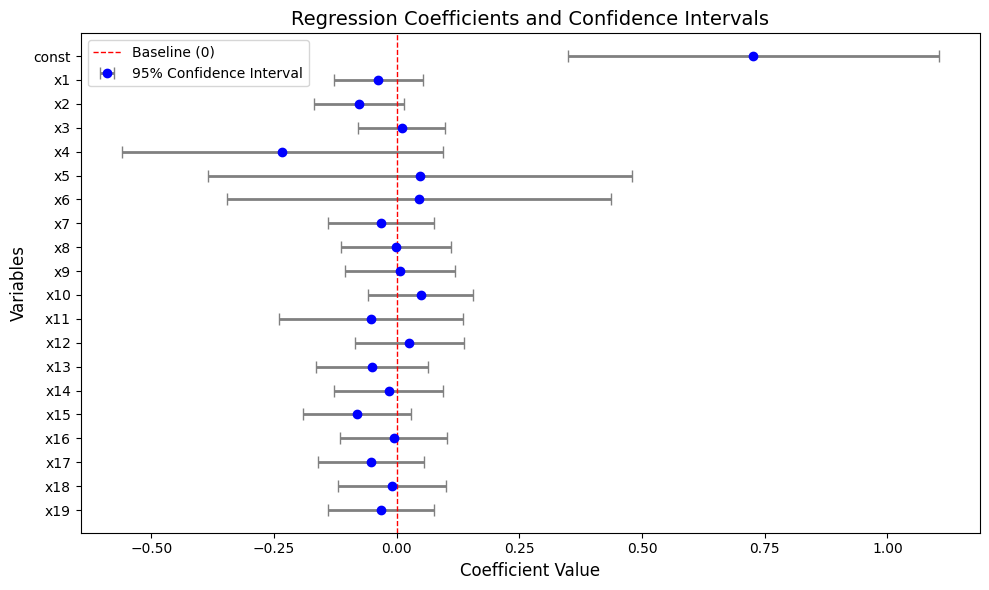

In [31]:
import matplotlib.pyplot as plt
import numpy as np


def visualize_regression_results(model):
    """
    可视化回归结果，包括参数估计值及其置信区间。

    参数：
        model: Statsmodels 的回归结果对象（fit() 的返回值）。
    """
    # 提取回归系数、置信区间、标准误差以及变量名称
    params = model.params
    conf = model.conf_int()
    std_err = model.bse  # 标准误差
    variables = model.model.exog_names  # 获取变量名称

    # 创建一个图形
    fig, ax = plt.subplots(figsize=(10, 6))

    # 绘制置信区间
    ax.errorbar(
        params,
        range(len(params)),
        xerr=1.96 * std_err,  # 95% 置信区间
        fmt='o',
        color='blue',
        ecolor='gray',
        elinewidth=2,
        capsize=4,
        label="95% Confidence Interval"
    )

    # 添加基线（零线）
    ax.axvline(x=0, color='red', linestyle='--', linewidth=1, label='Baseline (0)')

    # 设置 y 轴刻度
    ax.set_yticks(range(len(variables)))
    ax.set_yticklabels(variables)
    ax.invert_yaxis()  # 参数从上到下排列

    # 添加标题和标签
    ax.set_title("Regression Coefficients and Confidence Intervals", fontsize=14)
    ax.set_xlabel("Coefficient Value", fontsize=12)
    ax.set_ylabel("Variables", fontsize=12)

    # 添加图例
    ax.legend(loc="best")

    # 显示图形
    plt.tight_layout()
    plt.show()


# 示例：调用 visualize_regression_results 函数
visualize_regression_results(regression.model)

### 散户投资者与AI在技术分析中的比较

#### 散户投资者是否与AI在技术分析中达成一致？

我们在股票-投资者-周层面估计以下回归模型：

In [ ]:
# 准备回归数据
regression_data = pd.DataFrame({
    'sentiment_ta': sentiment_ta,  # TA情绪
    'sentiment_nonta': sentiment_nonta,  # 非TA情绪
    'ai_signal': ai_signal,  # AI信号
    'return_1d': return_1d,
    'return_1w': return_1w,
    'return_1m': return_1m,
    'return_1q': return_1q,
    'return_1y': return_1y,
    'earnings_news': earnings_news,
    'analyst_news': analyst_news,
    'control_variables': control_variables
})

# 定义自变量和因变量
X = regression_data[['ai_signal', 'return_1d', 'return_1w', 'return_1m', 'return_1q', 'return_1y', 'earnings_news', 'analyst_news', 'control_variables']]
y_ta = regression_data['sentiment_ta']
y_nonta = regression_data['sentiment_nonta']

# 添加固定效应和常数项
X = sm.add_constant(X)
X = X.join(pd.get_dummies(regression_data['investor_id']))
X = X.join(pd.get_dummies(regression_data['week']))

# 建立TA情绪回归模型
......

# 建立NonTA情绪回归模型
model_nonta = sm.OLS(y_nonta, X).fit()
print(model_nonta.summary())

In [37]:
import pandas as pd
import statsmodels.api as sm
import random


class SentimentRegression:
    def __init__(self, data, independent_vars, dependent_vars, fixed_effects):
        """
        初始化情绪回归分析类。

        参数：
            data (pd.DataFrame): 数据集。
            independent_vars (list): 自变量名称列表。
            dependent_vars (list): 因变量名称列表。
            fixed_effects (list): 固定效应变量名称列表。
        """
        self.data = data
        self.independent_vars = independent_vars
        self.dependent_vars = dependent_vars
        self.fixed_effects = fixed_effects
        self.models = {}  # 用于存储每个因变量的回归模型

    def prepare_data(self):
        """
        准备自变量和因变量数据，处理固定效应和添加常数项。

        返回：
            tuple: (X, y_dict)，其中 X 是自变量矩阵，y_dict 是因变量的字典。
        """
        # 提取自变量
        X = self.data[self.independent_vars].copy()

        # 转换为数值型并检查缺失值
        X = X.apply(pd.to_numeric, errors='coerce')

        # 添加固定效应
        for fe in self.fixed_effects:
            fixed_effects_dummies = pd.get_dummies(self.data[fe], prefix=fe, drop_first=True)
            X = X.join(fixed_effects_dummies)

        # 添加常数项
        X = sm.add_constant(X, has_constant='add')

        # 检查自变量是否包含空值或非数值型
        if X.isnull().any().any():
            raise ValueError(f"自变量数据包含空值或非数值型数据。请检查以下列：\n{X.columns[X.isnull().any()].tolist()}")

        # 提取因变量
        y_dict = {}
        for var in self.dependent_vars:
            y = pd.to_numeric(self.data[var], errors='coerce')  # 转换为数值型
            if y.isnull().any():
                raise ValueError(f"因变量 {var} 包含空值或非数值型数据。")
            y_dict[var] = y

        return X, y_dict

    def fit_models(self):
        """
        建立回归模型并拟合。
        """
        X, y_dict = self.prepare_data()

        for dependent_var, y in y_dict.items():
            print(f"正在拟合因变量：{dependent_var}")
            model = sm.OLS(y, X).fit()
            self.models[dependent_var] = model

    def summary(self, dependent_var):
        """
        返回指定因变量的回归结果摘要。

        参数：
            dependent_var (str): 指定的因变量名称。

        返回：
            str: 回归结果摘要。
        """
        if dependent_var not in self.models:
            raise ValueError(f"模型尚未拟合因变量 {dependent_var}。请先调用 fit_models 方法。")

        return self.models[dependent_var].summary()


# 生成 100 条数据
random.seed(42)  # 设置随机种子，确保结果可复现
num_samples = 100

# 随机生成数据
regression_data = pd.DataFrame({
    'sentiment_ta': [round(random.uniform(-1, 1), 2) for _ in range(num_samples)],  # TA情绪，范围[-1, 1]
    'sentiment_nonta': [round(random.uniform(-1, 1), 2) for _ in range(num_samples)],  # 非TA情绪，范围[-1, 1]
    'ai_signal': [round(random.uniform(0, 1), 2) for _ in range(num_samples)],  # AI信号，范围[0, 1]
    'return_1d': [round(random.uniform(-0.05, 0.05), 4) for _ in range(num_samples)],  # 1天收益率
    'return_1w': [round(random.uniform(-0.1, 0.1), 4) for _ in range(num_samples)],  # 1周收益率
    'return_1m': [round(random.uniform(-0.2, 0.2), 4) for _ in range(num_samples)],  # 1月收益率
    'return_1q': [round(random.uniform(-0.3, 0.3), 4) for _ in range(num_samples)],  # 1季度收益率
    'return_1y': [round(random.uniform(-0.5, 0.5), 4) for _ in range(num_samples)],  # 1年收益率
    'earnings_news': [round(random.uniform(-1, 1), 2) for _ in range(num_samples)],  # 盈利新闻情绪
    'analyst_news': [round(random.uniform(-1, 1), 2) for _ in range(num_samples)],  # 分析师新闻情绪
    'control_variables': [round(random.uniform(0, 1), 2) for _ in range(num_samples)],  # 控制变量
    'investor_id': [(i % 10) + 1 for i in range(num_samples)],  # 投资者ID（10类）
    'week': [(i % 5) + 1 for i in range(num_samples)]  # 周次（5类）
})

# 初始化回归分析类
regression = SentimentRegression(
    data=regression_data,
    independent_vars=[
        'ai_signal', 'return_1d', 'return_1w', 'return_1m',
        'return_1q', 'return_1y', 'earnings_news', 'analyst_news', 'control_variables'
    ],
    dependent_vars=['sentiment_ta', 'sentiment_nonta'],
    fixed_effects=['investor_id', 'week']
)

# 拟合模型
regression.fit_models()

# 查看TA情绪回归结果
print(regression.summary('sentiment_ta'))

# 查看NonTA情绪回归结果
print(regression.summary('sentiment_nonta'))

正在拟合因变量：sentiment_ta


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

#### 散户和AI技术策略的收益

我们构建基于散户TA情绪和AI信号的投资组合，计算其收益。

In [ ]:
# 合并情绪和AI信号数据
portfolio_data = messages[['ticker', 'date', 'sentiment_ta', 'sentiment_nonta']].merge(ai_signals, on=['ticker', 'date'])

# 根据TA情绪和AI信号进行排序
portfolio_data['ta_sentiment_rank'] = portfolio_data.groupby('date')['sentiment_ta'].rank(method='first')
portfolio_data['ai_signal_rank'] = portfolio_data.groupby('date')['ai_signal'].rank(method='first')

# 构建多空投资组合
......

# 计算投资组合收益
long_returns = long_stocks.groupby('date')['future_return'].mean()
short_returns = short_stocks.groupby('date')['future_return'].mean()
portfolio_returns = long_returns - short_returns

# 计算年化收益率
annual_return = portfolio_returns.mean() * 52  # 每年52周

print(f'投资组合的年化收益率为：{annual_return:.2%}')

### 散户投资者的羊群行为和技术分析

我们研究StockTwits上的TA情绪与Robinhood上的买入羊群行为的关系。

In [ ]:
# 准备回归数据
regression_data = pd.DataFrame({
    'robinhood_herding': robinhood_herding,  # Robinhood买入羊群行为指标
    'sentiment_ta': sentiment_ta,  # TA情绪
    'sentiment_nonta': sentiment_nonta,  # 非TA情绪
    'attention': attention,  # 注意力指标
    'earnings_news': earnings_news,
    'analyst_news': analyst_news,
    'control_variables': control_variables
})

# 定义自变量和因变量
......

# 添加固定效应和常数项
......

# 建立Logit回归模型
model = sm.Logit(y, X).fit()

# 输出回归结果
print(model.summary())

## 基本面分析和其他策略

### 不同策略情绪的收益预测能力

我们研究了不同策略相关消息的**情绪**对未来股票收益的预测能力。

In [ ]:
# 准备回归数据
regression_data = pd.DataFrame({
    'future_return': future_return,
    'sentiment_ta': sentiment_ta,
    'sentiment_fa': sentiment_fa,
    'sentiment_os': sentiment_os,
    'sentiment_ns': sentiment_ns,
    'attention': attention,
    'earnings_news': earnings_news,
    'analyst_news': analyst_news,
    'control_variables': control_variables
})

# 定义自变量和因变量
......

# 添加固定效应和常数项
......

# 建立回归模型
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())

### StockTwits情绪与散户订单流

我们发现StockTwits上的**情绪**与相应股票的**散户交易活动**显著相关。

In [ ]:
# 准备回归数据
regression_data = pd.DataFrame({
    'retail_oib': retail_oib,  # 散户订单不平衡
    'sentiment_ta': sentiment_ta,
    'sentiment_fa': sentiment_fa,
    'sentiment_os': sentiment_os,
    'sentiment_ns': sentiment_ns,
    'attention': attention,
    'earnings_news': earnings_news,
    'analyst_news': analyst_news,
    'control_variables': control_variables
})

# 定义自变量和因变量
......

# 添加固定效应和常数项
......

# 建立回归模型
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())

### 散户策略和散户订单流信息含量

我们进一步研究了散户投资者使用的策略如何影响散户订单流的**信息含量**。

In [ ]:
# 准备回归数据
regression_data = pd.DataFrame({
    'future_return': future_return,
    'retail_oib': retail_oib,
    'high_ta_usage': high_ta_usage,  # 高TA使用率指标
    'retail_oib_high_ta': retail_oib * high_ta_usage,
    'attention': attention,
    'earnings_news': earnings_news,
    'analyst_news': analyst_news,
    'control_variables': control_variables
})

# 定义自变量和因变量
X = regression_data[['retail_oib', 'high_ta_usage', 'retail_oib_high_ta', 'attention', 'earnings_news', 'analyst_news', 'control_variables']]
y = regression_data['future_return']

# 添加固定效应和常数项
X = sm.add_constant(X)
X = X.join(pd.get_dummies(regression_data['week']))

# 建立回归模型
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())